<div align = "center"><font size = "5.5">Classical Algorithms Implementation For Recommendation Systems</font></div>



In [1]:
# Accessing the MovieLens Dataset via Pandas

import pandas as pd

filepath = r"C:\Users\Hp\Downloads\ml-latest-small\ml-latest-small\ratings.csv"
dataframe_1 = pd.read_csv(filepath)

In [2]:
# MovieLens DataFrame
dataframe_1

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
# Removing the timestamp column from the DataFrame

dataframe_1 = dataframe_1.drop(dataframe_1.columns[[3]], axis=1)
#df = df.drop(columns=['timestamp'])
print('Input Movie Lens Dataset Dataframe : ')
dataframe_1

Input Movie Lens Dataset Dataframe : 


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [4]:
# Making the DataFrame Square and dimensions as 2^n (n = number of qubits = 9) so that it can be deployable on Quantum Emulations

dataframe_1 = dataframe_1[dataframe_1['movieId'] <= 512]
dataframe_1 = dataframe_1[dataframe_1['userId'] <= 512]

In [5]:
# Dividing the Rating Column by 5, Not necessary but easy for further processing...
dataframe_1['rating']/=5
dataframe_1

,userId,movieId,rating
0,1,1,0.8
1,1,3,0.8
2,1,6,0.8
3,1,47,1.0
4,1,50,1.0
...,...,...,...
81034,512,457,1.0
81035,512,474,0.8
81036,512,480,0.8
81037,512,500,0.6


In [6]:
# Converting the input Dataframe into Sparse Matrix for saving memory of computation, but not required as our dimension size is
# 512 x 512, which can be easily computed on any hardware.
from scipy import sparse
# Creating a sparse matrix
dataframe_1_sparse_matrix = sparse.csr_matrix((dataframe_1.rating.values, (dataframe_1.movieId.values, dataframe_1.userId.values)))
print('Input User Preference Rating Matrix in Sparse Form:')
print(dataframe_1_sparse_matrix)

Input User Preference Rating Matrix in Sparse Form:
  (1, 1)	0.8
  (1, 5)	0.8
  (1, 7)	0.9
  (1, 15)	0.5
  (1, 17)	0.9
  (1, 18)	0.7
  (1, 19)	0.8
  (1, 21)	0.7
  (1, 27)	0.6
  (1, 31)	1.0
  (1, 32)	0.6
  (1, 33)	0.6
  (1, 40)	1.0
  (1, 43)	1.0
  (1, 44)	0.6
  (1, 45)	0.8
  (1, 46)	1.0
  (1, 50)	0.6
  (1, 54)	0.6
  (1, 57)	1.0
  (1, 63)	1.0
  (1, 64)	0.8
  (1, 66)	0.8
  (1, 68)	0.5
  (1, 71)	1.0
  :	:
  (509, 336)	1.0
  (509, 346)	0.7
  (509, 349)	0.6
  (509, 353)	0.6
  (509, 354)	0.8
  (509, 357)	0.7
  (509, 373)	0.8
  (509, 387)	0.7
  (509, 404)	0.8
  (509, 411)	0.4
  (509, 416)	0.9
  (509, 425)	0.7
  (509, 437)	0.8
  (509, 444)	0.8
  (509, 446)	0.6
  (509, 455)	0.8
  (509, 462)	0.6
  (509, 489)	0.7
  (509, 512)	0.4
  (510, 6)	0.6
  (511, 11)	0.8
  (511, 414)	0.4
  (512, 19)	0.4
  (512, 186)	0.8
  (512, 313)	0.6


In [7]:
# Input Sparse Matrix to Dense Matrix Conversion with the User Numbers as the column numbers and Item Numbers as the Row Numbers...

Input_User_Preference_Rating_Matrix_Initialized_to_Zeroes = dataframe_1_sparse_matrix.toarray()
Input_User_Preference_Rating_Matrix_Initialized_to_Zero = Input_User_Preference_Rating_Matrix_Initialized_to_Zeroes[1:, 1:]

print('Input User Preference Rating Matrix Initialized to Zero:')
print(Input_User_Preference_Rating_Matrix_Initialized_to_Zero)

# Assigning another Variable to Input Matrix for further coding to avoid making changes in the Input matrix itself
a = Input_User_Preference_Rating_Matrix_Initialized_to_Zero
b = Input_User_Preference_Rating_Matrix_Initialized_to_Zero
c = Input_User_Preference_Rating_Matrix_Initialized_to_Zero


Input User Preference Rating Matrix Initialized to Zero:
[[0.8 0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0.6]
 [0.8 0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


In [9]:
# Input User Preference Rating Matrix Initialized to 0.5

import numpy as np
Input_User_Preference_Rating_Matrix_Initialized_to_0dot5 = np.where(Input_User_Preference_Rating_Matrix_Initialized_to_Zero == 0 , 0.5 , Input_User_Preference_Rating_Matrix_Initialized_to_Zero)
print('Input_User_Preference_Rating_Matrix_Initialized_to_0.5:')
print(Input_User_Preference_Rating_Matrix_Initialized_to_0dot5)
Input_User_Preference_Rating_Matrix_Initialized_to_0dot5.shape

Input_User_Preference_Rating_Matrix_Initialized_to_0.5:
[[0.8 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.6]
 [0.8 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]


(512, 512)

In [10]:
# Global Reconstructed Input User Preference Rating Matrix

train_averages = dict()
# get the global average of ratings in our train set.
Global_average = dataframe_1_sparse_matrix.sum()/dataframe_1_sparse_matrix.count_nonzero()
train_averages['global'] = Global_average
print(train_averages)

Global_User_Preference_Rating_Matrix = np.where(Input_User_Preference_Rating_Matrix_Initialized_to_Zero == 0 , Global_average , Input_User_Preference_Rating_Matrix_Initialized_to_Zero)
print('Global User Preference Rating Matrix:')
print(Global_User_Preference_Rating_Matrix)


constant_value = Global_average

# Define the dimensions of the matrix (rows and columns)
rows = Input_User_Preference_Rating_Matrix_Initialized_to_Zero.shape[0]
columns = Input_User_Preference_Rating_Matrix_Initialized_to_Zero.shape[1]

# Create a matrix filled with the constant value
Global_Reconstructed_Input_User_Preference_Rating_Matrix = np.full((rows, columns), constant_value)
print('Global Reconstructed Input User Preference Rating Matrix:')
print(Global_Reconstructed_Input_User_Preference_Rating_Matrix)


{'global': 0.6998685248488036}
Global User Preference Rating Matrix:
[[0.8        0.69986852 0.69986852 ... 0.69986852 0.69986852 0.69986852]
 [0.69986852 0.69986852 0.69986852 ... 0.69986852 0.69986852 0.6       ]
 [0.8        0.69986852 0.69986852 ... 0.69986852 0.69986852 0.69986852]
 ...
 [0.69986852 0.69986852 0.69986852 ... 0.69986852 0.69986852 0.69986852]
 [0.69986852 0.69986852 0.69986852 ... 0.69986852 0.69986852 0.69986852]
 [0.69986852 0.69986852 0.69986852 ... 0.69986852 0.69986852 0.69986852]]
Global Reconstructed Input User Preference Rating Matrix:
[[0.69986852 0.69986852 0.69986852 ... 0.69986852 0.69986852 0.69986852]
 [0.69986852 0.69986852 0.69986852 ... 0.69986852 0.69986852 0.69986852]
 [0.69986852 0.69986852 0.69986852 ... 0.69986852 0.69986852 0.69986852]
 ...
 [0.69986852 0.69986852 0.69986852 ... 0.69986852 0.69986852 0.69986852]
 [0.69986852 0.69986852 0.69986852 ... 0.69986852 0.69986852 0.69986852]
 [0.69986852 0.69986852 0.69986852 ... 0.69986852 0.6998685

In [11]:
# User Average Reconstructed User Preference Rating Matrix

# Getting the User Averages for every user i.e column average of the Dense Matrix

def get_user_average_ratings(sparse_matrix, of_users):
    # average ratings of user/axes
    ax = 1 if of_users else 0 # 1 - User axes,0 - Movie axes
    # ".A1" is for converting Column_Matrix to 1-D numpy array
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    # Boolean matrix of ratings ( whether a user rated that movie or not)
    is_rated = sparse_matrix!=0
    # no of ratings that each user OR movie..
    no_of_ratings = is_rated.sum(axis=ax).A1
    # max_user and max_movie ids in sparse matrix
    u,m = sparse_matrix.shape
    # create a dictionary of users and their average ratings..
    average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
    for i in range(u if of_users else m)
    if no_of_ratings[i] !=0}
    #return that dictionary of average ratings
    return average_ratings

train_averages['user'] = get_user_average_ratings(dataframe_1_sparse_matrix, of_users=True)
print(train_averages)



for i in range(len(a)):
    for j in range(len(a[i])):
        if a.T[i][j] == 0:
            # Get the user rating from the user dictionary based on user number (i+1)
            user_average_rating = train_averages['user'].get(i + 1, 0)
            # Replace the zero value in the matrix with the user rating
            a.T[i][j] = user_average_rating
User_Average_User_Preference_Rating_Matrix = a
print('User Average User Preference Rating Matrix:')
print(User_Average_User_Preference_Rating_Matrix)

# Create an empty matrix (list of lists) with dimensions 512x512
rows = Input_User_Preference_Rating_Matrix_Initialized_to_Zero.shape[0]
columns = Input_User_Preference_Rating_Matrix_Initialized_to_Zero.shape[1]

User_Average_Reconstructed_User_Preference_Rating_Matrix = np.zeros((rows, columns))

# Fill in the matrix columns with values from the dictionary
for col in range(columns):
    col_key = col + 1  # Column number starts from 1
    for row in range(rows):
        if col_key in train_averages['user']:
            User_Average_Reconstructed_User_Preference_Rating_Matrix[row, col] = train_averages['user'][col_key]
        else:
            pass
User_Average_Reconstructed_User_Preference_Rating_Matrix = np.array(User_Average_Reconstructed_User_Preference_Rating_Matrix)
print('User Average Reconstructed User Preference Rating Matrix:')
print(User_Average_Reconstructed_User_Preference_Rating_Matrix)


{'global': 0.6998685248488036, 'user': {1: 0.790909090909091, 2: 0.6741573033707864, 3: 0.6681818181818181, 4: 0.5, 5: 0.6227272727272728, 6: 0.7833333333333333, 7: 0.6511111111111112, 8: 0.575, 9: 0.6466666666666666, 10: 0.6944954128440365, 11: 0.7410714285714286, 12: 0.5312499999999999, 13: 0.6249999999999999, 14: 0.7571428571428571, 15: 0.6, 16: 0.7805555555555554, 17: 0.7599999999999999, 18: 0.7411764705882353, 19: 0.5535211267605632, 20: 0.5333333333333333, 21: 0.6855263157894737, 22: 0.6344827586206897, 23: 0.6615384615384615, 24: 0.6428571428571429, 25: 0.7265625, 26: 0.7166666666666667, 27: 0.6666666666666665, 28: 0.8428571428571429, 29: 0.8366666666666666, 30: 0.8, 31: 0.6606060606060606, 32: 0.8019867549668874, 34: 0.7432692307692308, 36: 0.7724137931034484, 38: 0.425, 39: 0.6428571428571429, 40: 0.7, 41: 0.7538461538461539, 42: 0.5333333333333333, 43: 0.6166666666666667, 44: 0.5128205128205128, 45: 0.625925925925926, 46: 0.5750000000000001, 47: 0.793181818181818, 48: 0.62413

In [12]:
# Movie Average Reconstructed User Preference Rating Matrix

# Getting the Movie Averages for every movie in dictionary i.e for every row of the Input User Preference Rating Matrix Initialized To Zero.

train_averages['movie'] = get_user_average_ratings(dataframe_1_sparse_matrix, of_users=False)
print(train_averages)


for i in range(len(b)):
    for j in range(len(b)):
        if b[i][j] == 0:
            # Get the user rating from the user dictionary based on user number (i+1)
            movie_average_rating = train_averages['movie'].get(i + 1, 0)
            # Replace the zero value in the matrix with the user rating
            b[i][j] = movie_average_rating
Movie_Average_User_Preference_Rating_Matrix = b
print('Movie Average User Preference Rating Matrix :')
print(Movie_Average_User_Preference_Rating_Matrix)

# Create an empty matrix (list of lists) with dimensions 610x610
rows = Input_User_Preference_Rating_Matrix_Initialized_to_Zero.shape[0]
columns = Input_User_Preference_Rating_Matrix_Initialized_to_Zero.shape[1]

Movie_Average_Reconstructed_User_Preference_Rating_Matrix = np.zeros((rows, columns))
#print(train_averages['movie'])

# Fill in the matrix columns with values from the dictionary
for row in range(rows):
    row_key = row + 1  # row number starts from 1
    for col in range(columns):
        if row_key in train_averages['movie']:
            Movie_Average_Reconstructed_User_Preference_Rating_Matrix[row, col] = train_averages['movie'][row_key]
        else:
            pass
Movie_Average_Reconstructed_User_Preference_Rating_Matrix = np.array(Movie_Average_Reconstructed_User_Preference_Rating_Matrix)
# The 'matrix' variable now contains the desired 610x610 matrix.
print('Movie Average Reconstructed User Preference Rating Matrix :')
print(Movie_Average_Reconstructed_User_Preference_Rating_Matrix)




{'global': 0.6998685248488036, 'user': {1: 0.790909090909091, 2: 0.6741573033707864, 3: 0.6681818181818181, 4: 0.5, 5: 0.6227272727272728, 6: 0.7833333333333333, 7: 0.6511111111111112, 8: 0.575, 9: 0.6466666666666666, 10: 0.6944954128440365, 11: 0.7410714285714286, 12: 0.5312499999999999, 13: 0.6249999999999999, 14: 0.7571428571428571, 15: 0.6, 16: 0.7805555555555554, 17: 0.7599999999999999, 18: 0.7411764705882353, 19: 0.5535211267605632, 20: 0.5333333333333333, 21: 0.6855263157894737, 22: 0.6344827586206897, 23: 0.6615384615384615, 24: 0.6428571428571429, 25: 0.7265625, 26: 0.7166666666666667, 27: 0.6666666666666665, 28: 0.8428571428571429, 29: 0.8366666666666666, 30: 0.8, 31: 0.6606060606060606, 32: 0.8019867549668874, 34: 0.7432692307692308, 36: 0.7724137931034484, 38: 0.425, 39: 0.6428571428571429, 40: 0.7, 41: 0.7538461538461539, 42: 0.5333333333333333, 43: 0.6166666666666667, 44: 0.5128205128205128, 45: 0.625925925925926, 46: 0.5750000000000001, 47: 0.793181818181818, 48: 0.62413

In [13]:
# Matrix Collaborative Filtering Reconstructed User Preference Rating Matrix

import numpy

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    '''
    R: rating matrix
    P: |U| * K (User features matrix)
    Q: |D| * K (Item features matrix)
    K: latent features
    steps: iterations
    alpha: learning rate
    beta: regularization parameter'''
    Q = Q.T

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    # calculate error
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])

                    for k in range(K):
                        # calculate gradient with a and beta parameter
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = numpy.dot(P,Q)

        e = 0

        for i in range(len(R)):

            for j in range(len(R[i])):

                if R[i][j] > 0:

                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)

                    for k in range(K):

                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        # 0.001: local minimum
        if e < 0.001:

            break

    return P, Q.T


In [14]:
u = dataframe_1_sparse_matrix.toarray()
u_zero = u[1:, 1:]


R = u_zero # u_zero = Input User Preference Rating Matrix Initialized To Zero
# N: num of User
N = len(R)
# M: num of Movie
M = len(R[0])
# Num of Features
K = 3 # can be changed to 1 or 2, as this parameter governs the accuracy of the reconstructed matrix

P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)

 

nP, nQ = matrix_factorization(R, P, Q, K)

nR = numpy.dot(nP, nQ.T)

In [23]:
Matrix_Collaborative_Filtering_Reconstructed_User_Preference_Rating_Matrix = nR

print('Matrix_Collaborative_Filtering_Reconstructed_User_Preference_Rating_Matrix ,rating values can be greater than 1:')
print(Matrix_Collaborative_Filtering_Reconstructed_User_Preference_Rating_Matrix)

# Set values greater than 1 to 1

Matrix_Collaborative_Filtering_Reconstructed_User_Preference_Rating_Matrix[Matrix_Collaborative_Filtering_Reconstructed_User_Preference_Rating_Matrix > 1] = 1
print('Matrix_Collaborative_Filtering_Reconstructed_User_Preference_Rating_Matrix:')
print(Matrix_Collaborative_Filtering_Reconstructed_User_Preference_Rating_Matrix)

Matrix_Collaborative_Filtering_Reconstructed_User_Preference_Rating_Matrix ,rating values can be greater than 1:
[[0.89509279 0.67478151 0.44049472 ... 0.48892128 0.87125735 0.82459002]
 [0.83464366 0.51213737 0.29429469 ... 0.47538575 0.74139203 0.73514524]
 [0.73871644 0.610647   0.44093568 ... 0.39555556 0.75724354 0.70632174]
 ...
 [0.65519654 0.61046692 0.73024716 ... 0.35064252 0.77660869 0.76272988]
 [0.67012134 0.55957055 0.40393586 ... 0.35782024 0.68995568 0.64164639]
 [0.69353209 0.49610038 0.53712495 ... 0.3925319  0.71078204 0.72685325]]
Matrix_Collaborative_Filtering_Reconstructed_User_Preference_Rating_Matrix:
[[0.89509279 0.67478151 0.44049472 ... 0.48892128 0.87125735 0.82459002]
 [0.83464366 0.51213737 0.29429469 ... 0.47538575 0.74139203 0.73514524]
 [0.73871644 0.610647   0.44093568 ... 0.39555556 0.75724354 0.70632174]
 ...
 [0.65519654 0.61046692 0.73024716 ... 0.35064252 0.77660869 0.76272988]
 [0.67012134 0.55957055 0.40393586 ... 0.35782024 0.68995568 0.6416463

In [25]:
# Classical Polynomial Transformation Reconstructed User Preference Rating Matrix ,a Universal Polynomial Transformation for any Recommendation Dataset.

import pandas as pd
import numpy as np
from scipy import sparse
from scipy.linalg import eigh
import pennylane as qml
import time

# import matplotlib.pyplot as plt

# Read the ratings data
filepath = r"C:\Users\Hp\Downloads\ml-latest-small\ml-latest-small\ratings.csv"
dataframe = pd.read_csv(filepath)

# Preprocess the data
dataframe = dataframe.drop(dataframe.columns[[3]], axis=1)
dataframe = dataframe[dataframe['movieId'] <= 512]
dataframe = dataframe[dataframe['userId'] <= 512]
dataframe['rating'] /= 5

# Creating a sparse matrix
dataframe_sparse_matrix = sparse.csr_matrix((dataframe.rating.values, (dataframe.movieId.values, dataframe.userId.values)))

# Initialize B as a 0.5 matrix of the same shape as A

B = np.where(dataframe_sparse_matrix.toarray()[1:, 1:] == 0, 0.5, dataframe_sparse_matrix.toarray()[1:, 1:])

# B is the input user preference rating matrix initialized to 0.5.

start_time = time.time()

# Set the desired degree
degree = 9

B_pre = np.zeros_like(B)

for i in range(2, degree + 1):
    power_matrix = np.linalg.matrix_power(B, i)
    max_power_i = np.max(power_matrix)
    B_pre += (1 / max_power_i) * power_matrix


B_pre += (1 / np.max(B)) * B
B_pre = B_pre / np.max(B_pre)

Classical_Polynomial_Transformation_Reconstructed_User_Preference_Rating_Matrix = B_pre

# B_pre is the Reconstructed User Preference Rating Matrix by Using Classical Polynomial Transformation Method.

end_time = time.time() 

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Classical Execution time: {elapsed_time} seconds")

print('Classical Polynomial Transformation Reconstructed User Preference Rating Matrix:')
print(Classical_Polynomial_Transformation_Reconstructed_User_Preference_Rating_Matrix)

Classical Execution time: 0.05142617225646973 seconds
Classical Polynomial Transformation Reconstructed User Preference Rating Matrix:
[[0.75953012 0.70311591 0.70104242 ... 0.69973159 0.7043885  0.7282531 ]
 [0.64848295 0.62805523 0.62628079 ... 0.62519654 0.62923794 0.6612312 ]
 [0.66436389 0.61103563 0.6093177  ... 0.60825121 0.61214633 0.63256981]
 ...
 [0.61489683 0.59552586 0.59385016 ... 0.59280993 0.59660902 0.61637091]
 [0.61510703 0.59574507 0.59406877 ... 0.5930282  0.59682858 0.61659736]
 [0.61529475 0.5959271  0.59425032 ... 0.59320944 0.59701092 0.61678557]]


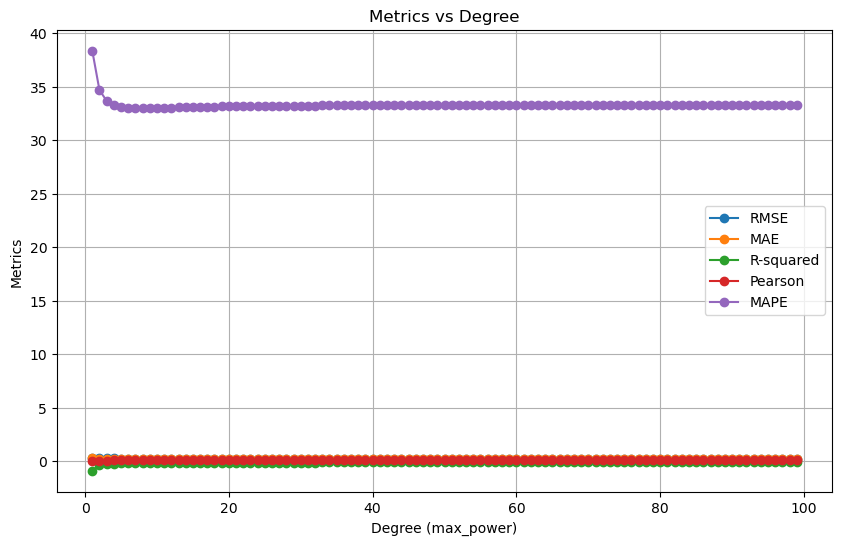

In [26]:
# Classical Error Graphs with Increasing Degree of Polynomial Transformations upto 100th degree

import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Read the ratings data
filepath = r"C:\Users\Hp\Downloads\ml-latest-small\ml-latest-small\ratings.csv"
dataframe = pd.read_csv(filepath)

# Preprocess the data
dataframe = dataframe.drop(dataframe.columns[[3]], axis=1)
dataframe = dataframe[dataframe['movieId'] <= 512]
dataframe = dataframe[dataframe['userId'] <= 512]
dataframe['rating'] /= 5

# Creating a sparse matrix
dataframe_sparse_matrix = sparse.csr_matrix((dataframe.rating.values, (dataframe.movieId.values, dataframe.userId.values)))

# Define the range of max_power values
max_power_range = range(1, 100)

# Initialize lists to store degree values and corresponding metrics
degree_values = []
rmse_values = []
mae_values = []
r2_values = []
pearson_values = []
mape_values = []

for max_power in max_power_range:
    # Initialize B_pre as a zero matrix of the same shape as A
    B = np.where(dataframe_sparse_matrix.toarray()[1:, 1:] == 0, 0.5, dataframe_sparse_matrix.toarray()[1:, 1:])
    B_pre = np.zeros_like(B)

    for i in range(2, max_power + 1):
        power_matrix = np.linalg.matrix_power(B, i)
        max_power_i = np.max(power_matrix)
        B_pre += (1 / max_power_i) * power_matrix

    # Add A itself to B_pre
    B_pre += (1 / np.max(B)) * B
    B_pre = B_pre / np.max(B_pre)

    # Create a DataFrame for the current B_pre
    matrix = B_pre
    num_users, num_items = matrix.shape
    user_list, item_list, rating_list = [], [], []

    for user in range(num_users):
        for item in range(num_items):
            rating = matrix[user][item]
            user_list.append(user)
            item_list.append(item)
            rating_list.append(rating)

    data_ = {'userId': user_list, 'movieId': item_list, 'My method': rating_list}
    df_ = pd.DataFrame(data_)
    df_['userId'] = df_['userId'] + 1
    df_['movieId'] = df_['movieId'] + 1
    df_.reset_index(drop=True, inplace=True)

    # Merge the original dataframe with the current B_pre DataFrame
    final_df = dataframe.merge(df_, on=['userId', 'movieId'], how='left')

    # Calculate metrics for the current max_power
    degree_values.append(max_power)
    rmse_values.append(np.sqrt(mean_squared_error(final_df['rating'], final_df['My method'])))
    mae_values.append(mean_absolute_error(final_df['rating'], final_df['My method']))
    r2_values.append(r2_score(final_df['rating'], final_df['My method']))
    pearson_coeff, _ = pearsonr(final_df['rating'], final_df['My method'])
    pearson_values.append(pearson_coeff)
    mape_values.append(np.mean(np.abs((final_df['rating'] - final_df['My method']) / final_df['rating'])) * 100)

# Create a DataFrame with all the metrics
result_df = pd.DataFrame({
    'Degree': degree_values,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'R-squared': r2_values,
    'Pearson': pearson_values,
    'MAPE': mape_values
})

# Plot RMSE, MAE, R-squared, Pearson, and MAPE vs Degree
plt.figure(figsize=(10, 6))
plt.plot(result_df['Degree'], result_df['RMSE'], label='RMSE', marker='o')
plt.plot(result_df['Degree'], result_df['MAE'], label='MAE', marker='o')
plt.plot(result_df['Degree'], result_df['R-squared'], label='R-squared', marker='o')
plt.plot(result_df['Degree'], result_df['Pearson'], label='Pearson', marker='o')
plt.plot(result_df['Degree'], result_df['MAPE'], label='MAPE', marker='o')
plt.xlabel('Degree (max_power)')
plt.ylabel('Metrics')
plt.title('Metrics vs Degree')
plt.legend()
plt.grid(True)
plt.show()


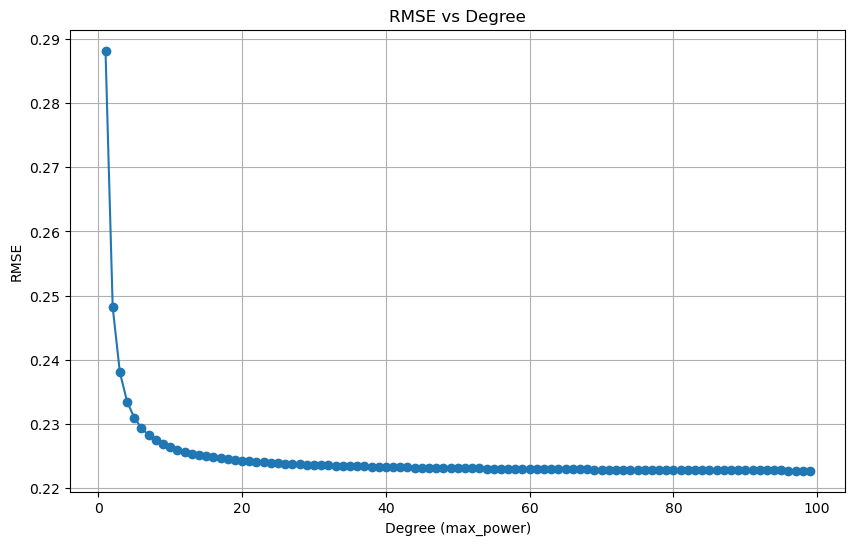

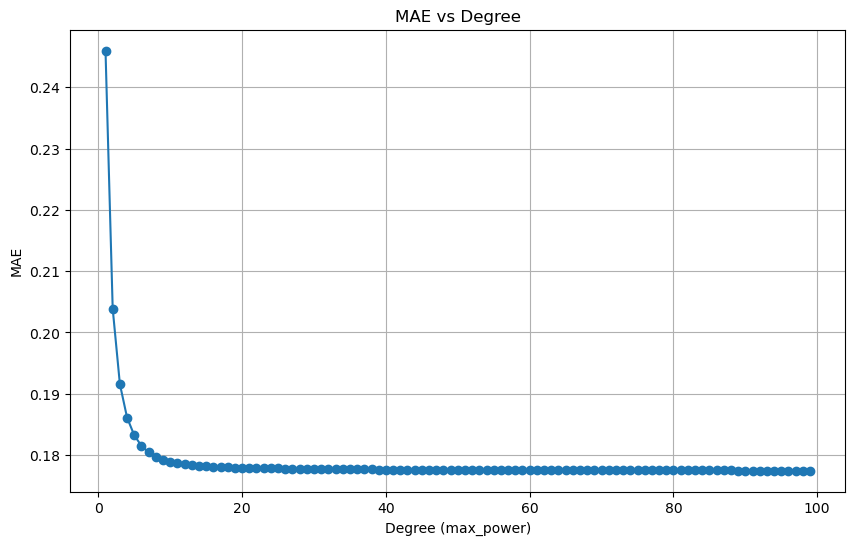

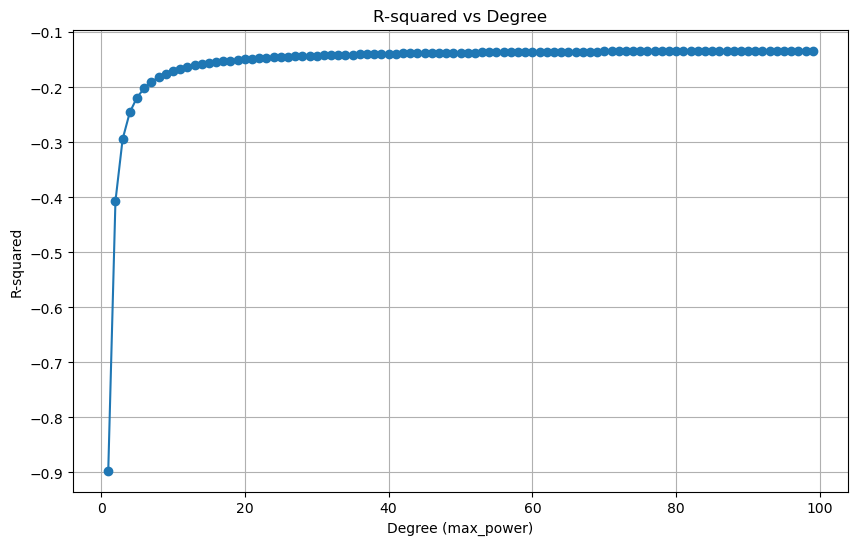

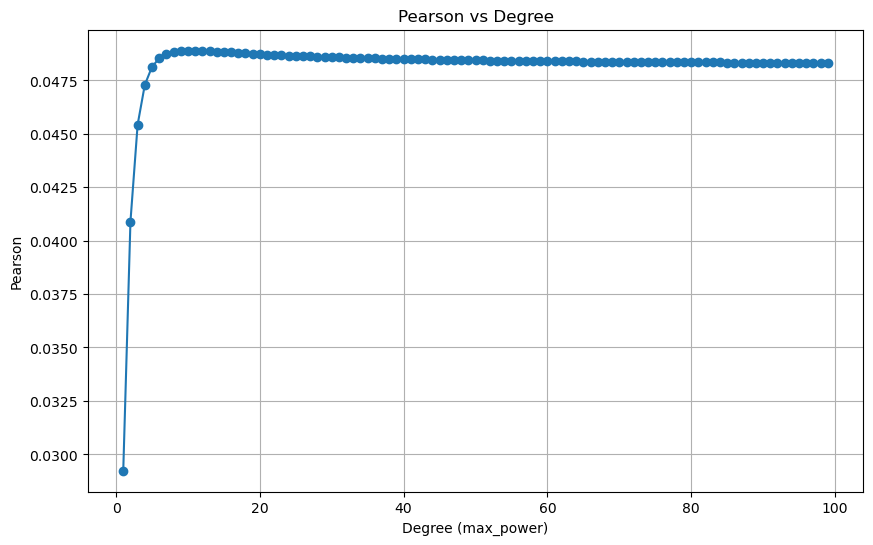

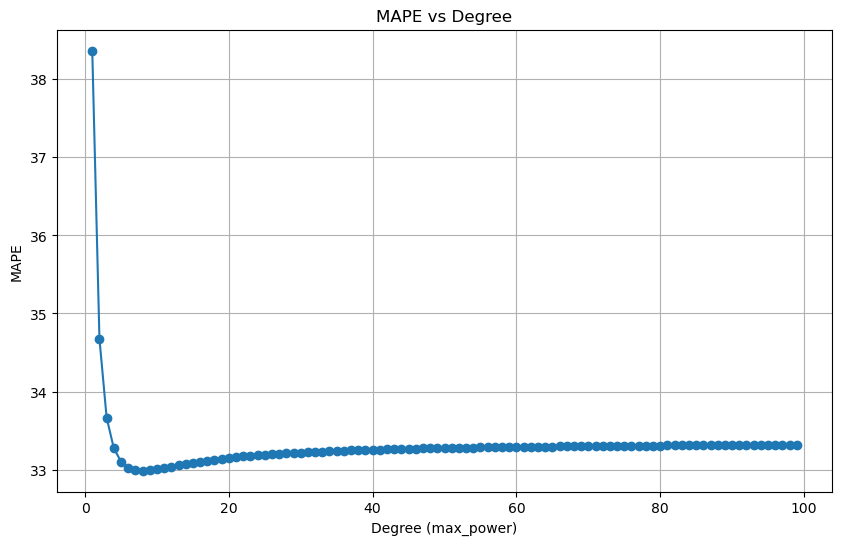

In [27]:
# Classical Error Graphs with Increasing Degree of Polynomial Transformations upto 100th degree continued...

import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Read the ratings data
filepath = r"C:\Users\Hp\Downloads\ml-latest-small\ml-latest-small\ratings.csv"
dataframe = pd.read_csv(filepath)

# Preprocess the data
dataframe = dataframe.drop(dataframe.columns[[3]], axis=1)
dataframe = dataframe[dataframe['movieId'] <= 512]
dataframe = dataframe[dataframe['userId'] <= 512]
dataframe['rating'] /= 5

# Creating a sparse matrix
dataframe_sparse_matrix = sparse.csr_matrix((dataframe.rating.values, (dataframe.movieId.values, dataframe.userId.values)))

# Define the range of max_power values
max_power_range = range(1, 100)

# Initialize lists to store degree values and corresponding metrics
degree_values = []
rmse_values = []
mae_values = []
r2_values = []
pearson_values = []
mape_values = []

for max_power in max_power_range:
    # Initialize B_pre as a zero matrix of the same shape as A
    B = np.where(dataframe_sparse_matrix.toarray()[1:, 1:] == 0, 0.5, dataframe_sparse_matrix.toarray()[1:, 1:])
    B_pre = np.zeros_like(B)

    for i in range(2, max_power + 1):
        power_matrix = np.linalg.matrix_power(B, i)
        max_power_i = np.max(power_matrix)
        B_pre += (1 / max_power_i) * power_matrix

    # Add A itself to B_pre
    B_pre += (1 / np.max(B)) * B
    B_pre = B_pre / np.max(B_pre)

    # Create a DataFrame for the current B_pre
    matrix = B_pre
    num_users, num_items = matrix.shape
    user_list, item_list, rating_list = [], [], []

    for user in range(num_users):
        for item in range(num_items):
            rating = matrix[user][item]
            user_list.append(user)
            item_list.append(item)
            rating_list.append(rating)

    data_ = {'userId': user_list, 'movieId': item_list, 'My method': rating_list}
    df_ = pd.DataFrame(data_)
    df_['userId'] = df_['userId'] + 1
    df_['movieId'] = df_['movieId'] + 1
    df_.reset_index(drop=True, inplace=True)

    # Merge the original dataframe with the current B_pre DataFrame
    final_df = dataframe.merge(df_, on=['userId', 'movieId'], how='left')

    # Calculate metrics for the current max_power
    degree_values.append(max_power)
    rmse_values.append(np.sqrt(mean_squared_error(final_df['rating'], final_df['My method'])))
    mae_values.append(mean_absolute_error(final_df['rating'], final_df['My method']))
    r2_values.append(r2_score(final_df['rating'], final_df['My method']))
    pearson_coeff, _ = pearsonr(final_df['rating'], final_df['My method'])
    pearson_values.append(pearson_coeff)
    mape_values.append(np.mean(np.abs((final_df['rating'] - final_df['My method']) / final_df['rating'])) * 100)

# Create a DataFrame with all the metrics
result_df = pd.DataFrame({
    'Degree': degree_values,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'R-squared': r2_values,
    'Pearson': pearson_values,
    'MAPE': mape_values
})

# Create separate figures for each metric
plt.figure(figsize=(10, 6))
plt.plot(result_df['Degree'], result_df['RMSE'], marker='o')
plt.xlabel('Degree (max_power)')
plt.ylabel('RMSE')
plt.title('RMSE vs Degree')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(result_df['Degree'], result_df['MAE'], marker='o')
plt.xlabel('Degree (max_power)')
plt.ylabel('MAE')
plt.title('MAE vs Degree')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(result_df['Degree'], result_df['R-squared'], marker='o')
plt.xlabel('Degree (max_power)')
plt.ylabel('R-squared')
plt.title('R-squared vs Degree')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(result_df['Degree'], result_df['Pearson'], marker='o')
plt.xlabel('Degree (max_power)')
plt.ylabel('Pearson')
plt.title('Pearson vs Degree')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(result_df['Degree'], result_df['MAPE'], marker='o')
plt.xlabel('Degree (max_power)')
plt.ylabel('MAPE')
plt.title('MAPE vs Degree')
plt.grid(True)
plt.show()
# print(np.max(B_pre)

In [28]:
# All Classical Implemented Algorithms Error Comparisons...

# Matrix to dataframe Conversions for Global,User Average and Movie Average Methods for all the error estimations

dataframe_1['Global Average Rating'] = 0.6998685248488036
dataframe_1['User Average Rating'] = dataframe_1['userId'].map(train_averages['user'])
dataframe_1['Movie Average Rating'] = dataframe_1['movieId'].map(train_averages['movie'])
#print(dataframe_1)

# Matrix of Collaborative Filtering Method to Dataframe Conversion...

# Your matrix
matrix = Matrix_Collaborative_Filtering_Reconstructed_User_Preference_Rating_Matrix

# Get the shape of the matrix to determine the number of users and items
num_users, num_items = matrix.shape

# Create lists for user, item, and rating
user_list, item_list, rating_list = [], [], []

# Iterate through the matrix and extract user, item, and rating
for user in range(num_users):
    for item in range(num_items):
        rating = matrix[user][item]
        user_list.append(user)
        item_list.append(item)
        rating_list.append(rating)

# Create a DataFrame
data_ = {'userId': user_list, 'movieId': item_list, 'Matrix Factorization Collaborative Rating': rating_list}
df_1 = pd.DataFrame(data_)

# Assuming 'df' is your DataFrame
df_1['userId'] = df_1['userId'] + 1  # This removes the first row
df_1['movieId'] = df_1['movieId'] + 1
# Reset the index
df_1.reset_index(drop=True, inplace=True)

# Now, 'df' contains the data in the desired format
print(df_1)

# Merging the Above Two Dataframes

Classical_df = pd.merge(dataframe_1 , df_1, on=['userId', 'movieId'], how='left')
#print(Classical_df)

# Matrix of Classical Polynomial Transformation Method to Dataframe Conversion

# Your matrix
matrix = B_pre

# Get the shape of the matrix to determine the number of users and items
num_users, num_items = matrix.shape

# Create lists for user, item, and rating
user_list, item_list, rating_list = [], [], []

# Iterate through the matrix and extract user, item, and rating
for user in range(num_users):
    for item in range(num_items):
        rating = matrix[user][item]
        user_list.append(user)
        item_list.append(item)
        rating_list.append(rating)

# Create a DataFrame
data_ = {'userId': user_list, 'movieId': item_list, 'Classical Polynomial Transformation method': rating_list}
df_ = pd.DataFrame(data_)

# Assuming 'df' is your DataFrame
df_['userId'] = df_['userId'] + 1  # This removes the first row
df_['movieId'] = df_['movieId'] + 1
# Reset the index
df_.reset_index(drop=True, inplace=True)

# Now, 'df' contains the data in the desired format
#print(df_)

Final_Classical_df = pd.merge(Classical_df , df_, on=['userId', 'movieId'], how='left')
print(Final_Classical_df)

# All the Error Calculations for all the Classical Implementations

rating = Final_Classical_df['rating']
global_average_rating = Final_Classical_df['Global Average Rating']
user_average_rating = Final_Classical_df['User Average Rating']
movie_average_rating = Final_Classical_df['Movie Average Rating']
collaborative_rating = Final_Classical_df['Matrix Factorization Collaborative Rating']
Polynomial_Transformation_Rating = Final_Classical_df['Classical Polynomial Transformation method']


user_average_rating = user_average_rating.fillna(0)  # Replace NaN values with 0, adjust as needed
movie_average_rating = movie_average_rating.fillna(0)  # Replace NaN values with 0, adjust as needed

# Calculate RMSE for each comparison
rmse_global_avg = np.sqrt(np.mean((rating - global_average_rating) ** 2))
rmse_user_avg = np.sqrt(np.mean((rating - user_average_rating) ** 2))
rmse_movie_avg = np.sqrt(np.mean((rating - movie_average_rating) ** 2))
rmse_collaborative = np.sqrt(np.mean((rating - collaborative_rating) ** 2))
rmse_polynomial_transformation = np.sqrt(np.mean((rating - Polynomial_Transformation_Rating) ** 2))

# Calculate MAE
mae_global_avg = mean_absolute_error(rating, global_average_rating)
mae_user_avg = mean_absolute_error(rating, user_average_rating)
mae_movie_avg = mean_absolute_error(rating, movie_average_rating)
mae_collaborative = mean_absolute_error(rating, collaborative_rating)
mae_polynomial_transformation = mean_absolute_error(rating, Polynomial_Transformation_Rating)

# Calculate R-squared
r2_global_avg = r2_score(rating, global_average_rating)
r2_user_avg = r2_score(rating, user_average_rating)
r2_movie_avg = r2_score(rating, movie_average_rating)
r2_collaborative = r2_score(rating, collaborative_rating)
r2_polynomial_transformation = r2_score(rating, Polynomial_Transformation_Rating)

# Calculate Pearson correlation coefficient and its p-value
corr_coefficient_global_avg, p_value_global_avg = pearsonr(rating, global_average_rating)
corr_coefficient_user_avg, p_value_user_avg = pearsonr(rating, user_average_rating)
corr_coefficient_movie_avg, p_value_movie_avg = pearsonr(rating, movie_average_rating)
corr_coefficient_collaborative, p_value_collaborative = pearsonr(rating, collaborative_rating)
corr_coefficient_polynomial_transformation, p_value_polynomial_transformation = pearsonr(rating, Polynomial_Transformation_Rating)

# Calculate mean absolute percentage error (MAPE)
mape_global_avg = np.mean(np.abs((rating - global_average_rating) / rating)) * 100
mape_user_avg = np.mean(np.abs((rating - user_average_rating) / rating)) * 100
mape_movie_avg = np.mean(np.abs((rating - movie_average_rating) / rating)) * 100
mape_collaborative = np.mean(np.abs((rating - collaborative_rating) / rating)) * 100
mape_polynomial_transformation = np.mean(np.abs((rating - Polynomial_Transformation_Rating) / rating)) * 100

# Print the results
print('All the Errors for the Implemented Classical Algorithms')
print(f'RMSE (Rating vs. Global Average Rating): {rmse_global_avg:.4f}')
print(f'RMSE (Rating vs. User Average Rating): {rmse_user_avg:.4f}')
print(f'RMSE (Rating vs. Movie Average Rating): {rmse_movie_avg:.4f}')
print(f'RMSE (Rating vs. Collaborative Rating): {rmse_collaborative:.4f}')
print(f'RMSE (Rating vs. Polynomial_Transformation_Rating): {rmse_polynomial_transformation:.4f}')

print(f'MAE (Rating vs. Global Average Rating): {mae_global_avg:.4f}')
print(f'MAE (Rating vs. User Average Rating): {mae_user_avg:.4f}')
print(f'MAE (Rating vs. Movie Average Rating): {mae_movie_avg:.4f}')
print(f'MAE (Rating vs. Collaborative Rating): {mae_collaborative:.4f}')
print(f'MAE (Rating vs. Polynomial_Transformation_Rating): {mae_polynomial_transformation:.4f}')

print(f'R-squared (Rating vs. Global Average Rating): {r2_global_avg:.4f}')
print(f'R-squared (Rating vs. User Average Rating): {r2_user_avg:.4f}')
print(f'R-squared (Rating vs. Movie Average Rating): {r2_movie_avg:.4f}')
print(f'R-squared (Rating vs. Collaborative Rating): {r2_collaborative:.4f}')
print(f'R-squared (Rating vs. Polynomial_Transformation_Rating): {r2_polynomial_transformation:.4f}')

print(f'Pearson Correlation Coefficient (Rating vs. Global Average Rating): {corr_coefficient_global_avg:.4f}')
print(f'Pearson Correlation Coefficient (Rating vs. User Average Rating): {corr_coefficient_user_avg:.4f}')
print(f'Pearson Correlation Coefficient (Rating vs. Movie Average Rating): {corr_coefficient_movie_avg:.4f}')
print(f'Pearson Correlation Coefficient (Rating vs. Collaborative Rating): {corr_coefficient_collaborative:.4f}')
print(f'Pearson Correlation Coefficient (Rating vs. Polynomial_Transformation_Rating): {corr_coefficient_polynomial_transformation:.4f}')

print(f'P-value (Rating vs. Global Average Rating): {p_value_global_avg:.4f}')
print(f'P-value (Rating vs. User Average Rating): {p_value_user_avg:.4f}')
print(f'P-value (Rating vs. Movie Average Rating): {p_value_movie_avg:.4f}')
print(f'P-value (Rating vs. Collaborative Rating): {p_value_collaborative:.4f}')
print(f'P-value (Rating vs. Polynomial_Transformation_Rating): {p_value_polynomial_transformation:.4f}')


print(f'MAPE (Rating vs. Global Average Rating): {mape_global_avg:.4f}%')
print(f'MAPE (Rating vs. User Average Rating): {mape_user_avg:.4f}%')
print(f'MAPE (Rating vs. Movie Average Rating): {mape_movie_avg:.4f}%')
print(f'MAPE (Rating vs. Collaborative Rating): {mape_collaborative:.4f}%')
print(f'MAPE (Rating vs. Polynomial_Transformation_Rating): {mape_polynomial_transformation:.4f}%')


        userId  movieId  Matrix Factorization Collaborative Rating
0            1        1                                   0.895093
1            1        2                                   0.674782
2            1        3                                   0.440495
3            1        4                                   0.730791
4            1        5                                   0.764474
...        ...      ...                                        ...
262139     512      508                                   0.318789
262140     512      509                                   0.607720
262141     512      510                                   0.392532
262142     512      511                                   0.710782
262143     512      512                                   0.726853

[262144 rows x 3 columns]
       userId  movieId  rating  Global Average Rating  User Average Rating  \
0           1        1     0.8               0.699869             0.790909   
1           1

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [29]:
Final_Classical_df

,userId,movieId,rating,Global Average Rating,User Average Rating,Movie Average Rating,Matrix Factorization Collaborative Rating,Classical Polynomial Transformation method
0,1,1,0.8,0.699869,0.790909,0.842857,0.895093,0.754578
1,1,3,0.8,0.699869,0.790909,0.100000,0.440495,0.723488
2,1,6,0.8,0.699869,0.790909,0.698667,0.842131,0.850202
3,1,47,1.0,0.699869,0.790909,0.645455,0.650919,0.729138
4,1,50,1.0,0.699869,0.790909,0.671429,0.596905,0.729010
...,...,...,...,...,...,...,...,...
11404,512,457,1.0,0.699869,0.600000,0.766667,0.659633,0.609208
11405,512,474,0.8,0.699869,0.600000,0.647656,0.551731,0.649895
11406,512,480,0.8,0.699869,0.600000,0.619512,0.605292,0.628621
11407,512,500,0.6,0.699869,0.600000,0.578947,0.415746,0.609083


Eigenvalues for Input User Preference Rating Matrix Initialized to 0.0:
[(338.757239718252+0j), (-0.30798246458339135+3.7966737400744015j), (-0.30798246458339135-3.7966737400744015j), (-0.8439587057663754+0.6999958285838676j), (-0.8439587057663754-0.6999958285838676j), (0.049886348143671974+0.9653470538321485j), (0.049886348143671974-0.9653470538321485j), (-0.9284043544127899+0j), (-0.7379753623423414+0.4384126286555461j), (-0.7379753623423414-0.4384126286555461j), (-0.6254244499793977+0.5833497691249726j), (-0.6254244499793977-0.5833497691249726j), (-0.8042549773490892+0.12369352919644734j), (-0.8042549773490892-0.12369352919644734j), (-0.23965491924204824+0.8310814675060546j), (-0.23965491924204824-0.8310814675060546j), (-0.27390300198120887+0.7982398722038827j), (-0.27390300198120887-0.7982398722038827j), (-0.6786146468385826+0.15601586031951603j), (-0.6786146468385826-0.15601586031951603j), (-0.5799353351800676+0.4052305030017739j), (-0.5799353351800676-0.4052305030017739j), (-0.45

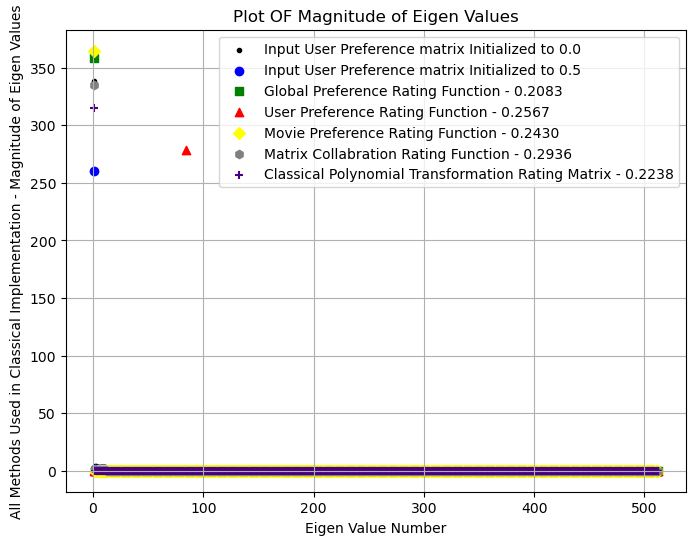

512


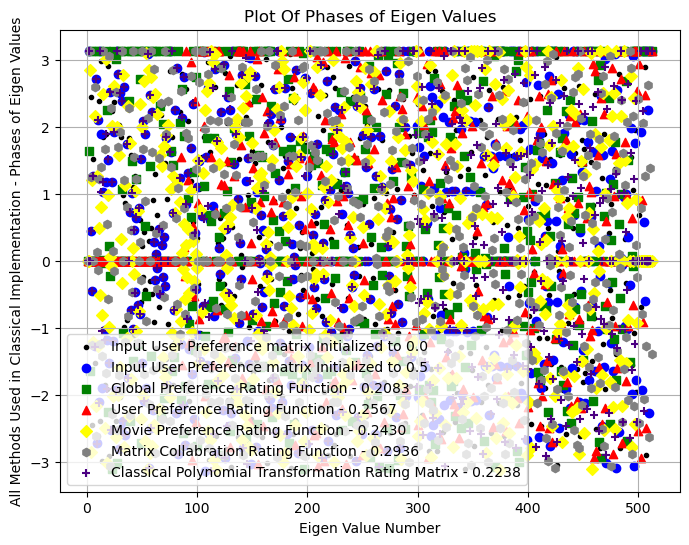

512


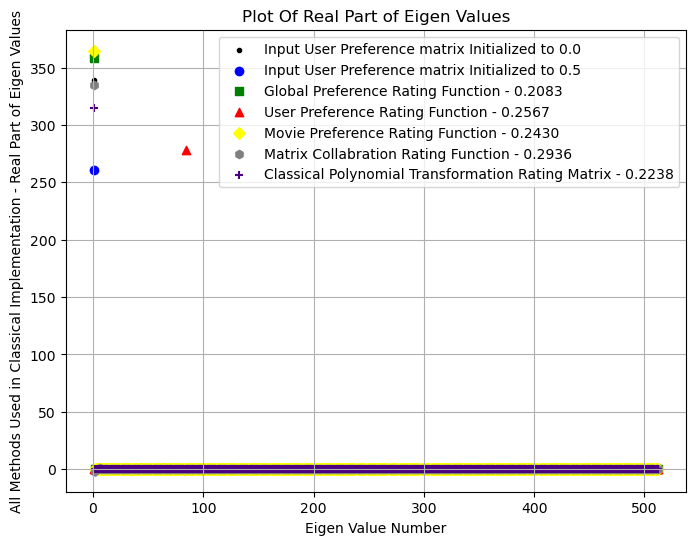

512


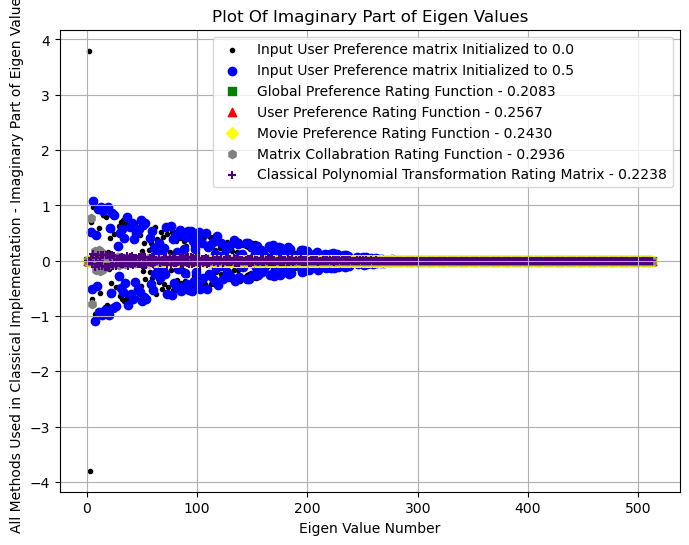

In [30]:
# Eigen Value Graphs of all the Classical Implemented Algorithms for Recommendation Systems

# Eigen Values for Input User Preference Rating Matrix Initialized to 0.0

eigenvalues_input_matrix_0 = np.linalg.eigvals(Input_User_Preference_Rating_Matrix_Initialized_to_Zero)
eigenvalues_input_list_0 = eigenvalues_input_matrix_0.tolist()

print('Eigenvalues for Input User Preference Rating Matrix Initialized to 0.0:')
print(eigenvalues_input_list_0) #Eigenvalues i.e complex number eigen values of the Input Sparse Matrix


# Eigen Values for Input User Preference Rating Matrix Initialized to 0.5

eigenvalues_input_matrix_1 = np.linalg.eigvals(Input_User_Preference_Rating_Matrix_Initialized_to_0dot5)
eigenvalues_input_list_1 = eigenvalues_input_matrix_1.tolist()

print('Eigenvalues for Input User Preference Rating Matrix Initialized to 0.5:')
print(eigenvalues_input_list_1) #Eigenvalues i.e complex number eigen values of the Input Sparse Matrix

# Eigen Values for Global Average Reconstructed User Preference Rating Matrix

eigenvalues_input_matrix_2 = np.linalg.eigvals(Global_Reconstructed_Input_User_Preference_Rating_Matrix)
eigenvalues_input_list_2 = eigenvalues_input_matrix_2.tolist()
  # Replace this with your desired constant value

print('Eigenvalues for Global Average Reconstructed User Preference Rating Matrix:')
print(eigenvalues_input_list_2) 

# Eigen Values for User Average Reconstructed User Preference Rating Matrix

eigenvalues_input_matrix_3 = np.linalg.eigvals(User_Average_Reconstructed_User_Preference_Rating_Matrix)
eigenvalues_input_list_3 = eigenvalues_input_matrix_3.tolist()

print('Eigen Values for User Average Reconstructed User Preference Rating Matrix:')
print(eigenvalues_input_list_3) 


# Eigen Values for Movie Average Reconstructed User Preference Rating Matrix

eigenvalues_input_matrix_4 = np.linalg.eigvals(Movie_Average_Reconstructed_User_Preference_Rating_Matrix)
eigenvalues_input_list_4 = eigenvalues_input_matrix_4.tolist()

print('Eigen Values for Movie Average Reconstructed User Preference Rating Matrix:')
print(eigenvalues_input_list_4) 

# Eigen Values for Matrix Collaborative Factoring Method's Reconstructed User Preference Rating Matrix

eigenvalues_input_matrix_5 = np.linalg.eigvals(Matrix_Collaborative_Filtering_Reconstructed_User_Preference_Rating_Matrix)
eigenvalues_input_list_5 = eigenvalues_input_matrix_5.tolist()

print('Eigen Values for Matrix Collaborative Factoring Methods Reconstructed User Preference Rating Matrix:')
print(eigenvalues_input_list_5) 

# Eigen Values for Classical Polynomial Transformation Method's Reconstructed User Preference Rating Matrix

eigenvalues_input_matrix_6 = np.linalg.eigvals(Classical_Polynomial_Transformation_Reconstructed_User_Preference_Rating_Matrix)
eigenvalues_input_list_6 = eigenvalues_input_matrix_6.tolist()

print('Classical Polynomial Transformation Methods Reconstructed User Preference Rating Matrix:')
print(eigenvalues_input_list_6)


import cmath

# Magnitude,Phase,Real and Imaginary Eigen Value Lists of the Input User Preference Rating Matrix Initialized to 0.0

# Initialize lists to store the results
magnitude_list_0 = []
phase_list_0 = []
real_list_0 = []
imaginary_list_0 = []

# Calculate the magnitude, phase, real, and imaginary parts for each complex number
for z in eigenvalues_input_list_0:
    magnitude_0 = abs(z)
    phase_0 = cmath.phase(z)
    real_part_0 = z.real
    imaginary_part_0 = z.imag
    
    # Append the results to the respective lists
    magnitude_list_0.append(magnitude_0)
    phase_list_0.append(phase_0)
    real_list_0.append(real_part_0)
    imaginary_list_0.append(imaginary_part_0)

# Print the results
print("Magnitude List:", magnitude_list_0)
print("Phase List:", phase_list_0)
print("Real Value List:", real_list_0)
print("Imaginary Value List:", imaginary_list_0)

# Magnitude,Phase,Real and Imaginary Eigen Value Lists of the Input User Preference Rating Matrix Initialized to 0.5

# Initialize lists to store the results
magnitude_list_1 = []
phase_list_1 = []
real_list_1 = []
imaginary_list_1 = []

# Calculate the magnitude, phase, real, and imaginary parts for each complex number
for z in eigenvalues_input_list_1:
    magnitude_1 = abs(z)
    phase_1 = cmath.phase(z)
    real_part_1 = z.real
    imaginary_part_1 = z.imag
    
    # Append the results to the respective lists
    magnitude_list_1.append(magnitude_1)
    phase_list_1.append(phase_1)
    real_list_1.append(real_part_1)
    imaginary_list_1.append(imaginary_part_1)

# Print the results
print("Magnitude List:", magnitude_list_1)
print("Phase List:", phase_list_1)
print("Real Value List:", real_list_1)
print("Imaginary Value List:", imaginary_list_1)

# Initialize lists to store the results
magnitude_list_2 = []
phase_list_2 = []
real_list_2 = []
imaginary_list_2 = []

# Calculate the magnitude, phase, real, and imaginary parts for each complex number
for z in eigenvalues_input_list_2:
    magnitude_2 = abs(z)
    phase_2 = cmath.phase(z)
    real_part_2 = z.real
    imaginary_part_2 = z.imag
    
    # Append the results to the respective lists
    magnitude_list_2.append(magnitude_2)
    phase_list_2.append(phase_2)
    real_list_2.append(real_part_2)
    imaginary_list_2.append(imaginary_part_2)

# Print the results
print("Magnitude List:", magnitude_list_2)
print("Phase List:", phase_list_2)
print("Real Value List:", real_list_2)
print("Imaginary Value List:", imaginary_list_2)

# Initialize lists to store the results
magnitude_list_3 = []
phase_list_3 = []
real_list_3 = []
imaginary_list_3 = []

# Calculate the magnitude, phase, real, and imaginary parts for each complex number
for z in eigenvalues_input_list_3:
    magnitude_3 = abs(z)
    phase_3 = cmath.phase(z)
    real_part_3 = z.real
    imaginary_part_3 = z.imag
    
    # Append the results to the respective lists
    magnitude_list_3.append(magnitude_3)
    phase_list_3.append(phase_3)
    real_list_3.append(real_part_3)
    imaginary_list_3.append(imaginary_part_3)

# Print the results
print("Magnitude List:", magnitude_list_3)
print("Phase List:", phase_list_3)
print("Real Value List:", real_list_3)
print("Imaginary Value List:", imaginary_list_3)

# Initialize lists to store the results
magnitude_list_4 = []
phase_list_4 = []
real_list_4 = []
imaginary_list_4 = []

# Calculate the magnitude, phase, real, and imaginary parts for each complex number
for z in eigenvalues_input_list_4:
    magnitude_4 = abs(z)
    phase_4 = cmath.phase(z)
    real_part_4 = z.real
    imaginary_part_4 = z.imag
    
    # Append the results to the respective lists
    magnitude_list_4.append(magnitude_4)
    phase_list_4.append(phase_4)
    real_list_4.append(real_part_4)
    imaginary_list_4.append(imaginary_part_4)

# Print the results
print("Magnitude List:", magnitude_list_4)
print("Phase List:", phase_list_4)
print("Real Value List:", real_list_4)
print("Imaginary Value List:", imaginary_list_4)

# Initialize lists to store the results
magnitude_list_5 = []
phase_list_5 = []
real_list_5 = []
imaginary_list_5 = []

# Calculate the magnitude, phase, real, and imaginary parts for each complex number
for z in eigenvalues_input_list_5:
    magnitude_5 = abs(z)
    phase_5 = cmath.phase(z)
    real_part_5 = z.real
    imaginary_part_5 = z.imag
    
    # Append the results to the respective lists
    magnitude_list_5.append(magnitude_5)
    phase_list_5.append(phase_5)
    real_list_5.append(real_part_5)
    imaginary_list_5.append(imaginary_part_5)

# Print the results
print("Magnitude List:", magnitude_list_5)
print("Phase List:", phase_list_5)
print("Real Value List:", real_list_5)
print("Imaginary Value List:", imaginary_list_5)

# Initialize lists to store the results
magnitude_list_6 = []
phase_list_6 = []
real_list_6 = []
imaginary_list_6 = []

# Calculate the magnitude, phase, real, and imaginary parts for each complex number
for z in eigenvalues_input_list_6:
    magnitude_6 = abs(z)
    phase_6 = cmath.phase(z)
    real_part_6 = z.real
    imaginary_part_6 = z.imag
    
    # Append the results to the respective lists
    magnitude_list_6.append(magnitude_6)
    phase_list_6.append(phase_6)
    real_list_6.append(real_part_6)
    imaginary_list_6.append(imaginary_part_6)

# Print the results
print("Magnitude List:", magnitude_list_6)
print("Phase List:", phase_list_6)
print("Real Value List:", real_list_6)
print("Imaginary Value List:", imaginary_list_6)


# Eigen Value Magnitude Plots vs Eigen Value Number for All Reconstructed Matrices and Original Input Matrices in the Recommendation System Solving by Classical Methods.

import matplotlib.pyplot as plt

# Sample data for x values (assuming the same x values for all lists)
x = np.linspace(1,512,512)
print(len(x))

# Sample data for four different sets of y values
y0 = magnitude_list_0 # Input User Preference matrix Initialized to 0.0
y1 = magnitude_list_1 # Input User Preference matrix Initialized to 0.5 
y2 = magnitude_list_2 # Global Preference Rating Matrix 
y3 = magnitude_list_3 # User Preference Rating Matrix 
y4 = magnitude_list_4 # Movie Preference Rating Matrix 
y5 = magnitude_list_5 # Matrix Collaborative Rating Method Matrix
y6 = magnitude_list_6 # Classical Polynomial Transformation Rating Matrix

# Create a single plot for all data
plt.figure(figsize=(8, 6))  # Create a new figure

# Scatter plots for each set of y values

plt.scatter(x, y0, color='black', label='Input User Preference matrix Initialized to 0.0', marker='.')
plt.scatter(x, y1, color='blue', label='Input User Preference matrix Initialized to 0.5', marker='o')
plt.scatter(x, y2, color='green', label='Global Preference Rating Function - 0.2083', marker='s')
plt.scatter(x, y3, color='red', label='User Preference Rating Function - 0.2567', marker='^')
plt.scatter(x, y4, color='yellow', label='Movie Preference Rating Function - 0.2430', marker='D')
plt.scatter(x, y5, color='grey', label='Matrix Collabration Rating Function - 0.2936', marker='h')
plt.scatter(x, y6, color='indigo', label='Classical Polynomial Transformation Rating Matrix - 0.2238', marker='+')

# Line Plots for each set of y values

# plt.plot(x, y0, color='black', label='Input User Preference matrix Initialized to 0.0', marker='.')
# plt.plot(x, y1, color='blue', label='Input User Preference matrix Initialized to 0.5', marker='o')
# plt.plot(x, y2, color='green', label='Global Preference Rating Function - 0.2083', marker='s')
# plt.plot(x, y3, color='red', label='User Preference Rating Function - 0.2567', marker='^')
# plt.plot(x, y4, color='yellow', label='Movie Preference Rating Function - 0.2430', marker='D')
# plt.plot(x, y5, color='grey', label='Matrix Collabration Rating Function - 0.2936', marker='h')
# plt.plot(x, y6, color='indigo', label='Classical Polynomial Transformation Rating Matrix - 0.2238', marker='+')

# Add labels and a legend
plt.xlabel('Eigen Value Number')
plt.ylabel('All Methods Used in Classical Implementation - Magnitude of Eigen Values')
plt.legend()

# Show the plot
plt.grid(True)
plt.title('Plot OF Magnitude of Eigen Values')

#plt.figure(figsize=(100, 60))
plt.show()

# Eigen Value Phase Plots vs Eigen Value Number for All Reconstructed Matrices and Original Input Matrices in the Recommendation System Solving by Classical Methods.

# Sample data for x values (assuming the same x values for all lists)
x = np.linspace(1,512,512)
print(len(x))

# Sample data for four different sets of y values
y0 = phase_list_0 # Input User Preference matrix Initialized to 0.0
y1 = phase_list_1 # Input User Preference matrix Initialized to 0.5 
y2 = phase_list_2 # Global Preference Rating Matrix 
y3 = phase_list_3 # User Preference Rating Matrix 
y4 = phase_list_4 # Movie Preference Rating Matrix 
y5 = phase_list_5 # Matrix Collaborative Rating Method Matrix
y6 = phase_list_6 # Classical Polynomial Transformation Rating Matrix

# Create a single plot for all data
plt.figure(figsize=(8, 6))  # Create a new figure

# Scatter plots for each set of y values

plt.scatter(x, y0, color='black', label='Input User Preference matrix Initialized to 0.0', marker='.')
plt.scatter(x, y1, color='blue', label='Input User Preference matrix Initialized to 0.5', marker='o')
plt.scatter(x, y2, color='green', label='Global Preference Rating Function - 0.2083', marker='s')
plt.scatter(x, y3, color='red', label='User Preference Rating Function - 0.2567', marker='^')
plt.scatter(x, y4, color='yellow', label='Movie Preference Rating Function - 0.2430', marker='D')
plt.scatter(x, y5, color='grey', label='Matrix Collabration Rating Function - 0.2936', marker='h')
plt.scatter(x, y6, color='indigo', label='Classical Polynomial Transformation Rating Matrix - 0.2238', marker='+')

# Line Plots for each set of y values

# plt.plot(x, y0, color='black', label='Input User Preference matrix Initialized to 0.0', marker='.')
# plt.plot(x, y1, color='blue', label='Input User Preference matrix Initialized to 0.5', marker='o')
# plt.plot(x, y2, color='green', label='Global Preference Rating Function - 0.2083', marker='s')
# plt.plot(x, y3, color='red', label='User Preference Rating Function - 0.2567', marker='^')
# plt.plot(x, y4, color='yellow', label='Movie Preference Rating Function - 0.2430', marker='D')
# plt.plot(x, y5, color='grey', label='Matrix Collabration Rating Function - 0.2936', marker='h')
# plt.plot(x, y6, color='indigo', label='Classical Polynomial Transformation Rating Matrix - 0.2238', marker='+')

# Add labels and a legend
plt.xlabel('Eigen Value Number')
plt.ylabel('All Methods Used in Classical Implementation - Phases of Eigen Values')
plt.legend()

# Show the plot
plt.grid(True)
plt.title('Plot Of Phases of Eigen Values')

#plt.figure(figsize=(100, 60))
plt.show()

# Eigen Value Real Plots vs Eigen Value Number for All Reconstructed Matrices and Original Input Matrices in the Recommendation System Solving by Classical Methods.

# Sample data for x values (assuming the same x values for all lists)
x = np.linspace(1,512,512)
print(len(x))

# Sample data for four different sets of y values
y0 = real_list_0 # Input User Preference matrix Initialized to 0.0
y1 = real_list_1 # Input User Preference matrix Initialized to 0.5 
y2 = real_list_2 # Global Preference Rating Matrix 
y3 = real_list_3 # User Preference Rating Matrix 
y4 = real_list_4 # Movie Preference Rating Matrix 
y5 = real_list_5 # Matrix Collaborative Rating Method Matrix
y6 = real_list_6 # Classical Polynomial Transformation Rating Matrix

# Create a single plot for all data
plt.figure(figsize=(8, 6))  # Create a new figure

# Scatter plots for each set of y values

plt.scatter(x, y0, color='black', label='Input User Preference matrix Initialized to 0.0', marker='.')
plt.scatter(x, y1, color='blue', label='Input User Preference matrix Initialized to 0.5', marker='o')
plt.scatter(x, y2, color='green', label='Global Preference Rating Function - 0.2083', marker='s')
plt.scatter(x, y3, color='red', label='User Preference Rating Function - 0.2567', marker='^')
plt.scatter(x, y4, color='yellow', label='Movie Preference Rating Function - 0.2430', marker='D')
plt.scatter(x, y5, color='grey', label='Matrix Collabration Rating Function - 0.2936', marker='h')
plt.scatter(x, y6, color='indigo', label='Classical Polynomial Transformation Rating Matrix - 0.2238', marker='+')

# Line Plots for each set of y values

# plt.plot(x, y0, color='black', label='Input User Preference matrix Initialized to 0.0', marker='.')
# plt.plot(x, y1, color='blue', label='Input User Preference matrix Initialized to 0.5', marker='o')
# plt.plot(x, y2, color='green', label='Global Preference Rating Function - 0.2083', marker='s')
# plt.plot(x, y3, color='red', label='User Preference Rating Function - 0.2567', marker='^')
# plt.plot(x, y4, color='yellow', label='Movie Preference Rating Function - 0.2430', marker='D')
# plt.plot(x, y5, color='grey', label='Matrix Collabration Rating Function - 0.2936', marker='h')
# plt.plot(x, y6, color='indigo', label='Classical Polynomial Transformation Rating Matrix - 0.2238', marker='+')

# Add labels and a legend
plt.xlabel('Eigen Value Number')
plt.ylabel('All Methods Used in Classical Implementation - Real Part of Eigen Values')
plt.legend()

# Show the plot
plt.grid(True)
plt.title('Plot Of Real Part of Eigen Values')

#plt.figure(figsize=(100, 60))
plt.show()

# Eigen Value Imaginary Plots vs Eigen Value Number for All Reconstructed Matrices and Original Input Matrices in the Recommendation System Solving by Classical Methods.

# Sample data for x values (assuming the same x values for all lists)
x = np.linspace(1,512,512)
print(len(x))

# Sample data for four different sets of y values
y0 = imaginary_list_0 # Input User Preference matrix Initialized to 0.0
y1 = imaginary_list_1 # Input User Preference matrix Initialized to 0.5 
y2 = imaginary_list_2 # Global Preference Rating Matrix 
y3 = imaginary_list_3 # User Preference Rating Matrix 
y4 = imaginary_list_4 # Movie Preference Rating Matrix 
y5 = imaginary_list_5 # Matrix Collaborative Rating Method Matrix
y6 = imaginary_list_6 # Classical Polynomial Transformation Rating Matrix

# Create a single plot for all data
plt.figure(figsize=(8, 6))  # Create a new figure

# Scatter plots for each set of y values

plt.scatter(x, y0, color='black', label='Input User Preference matrix Initialized to 0.0', marker='.')
plt.scatter(x, y1, color='blue', label='Input User Preference matrix Initialized to 0.5', marker='o')
plt.scatter(x, y2, color='green', label='Global Preference Rating Function - 0.2083', marker='s')
plt.scatter(x, y3, color='red', label='User Preference Rating Function - 0.2567', marker='^')
plt.scatter(x, y4, color='yellow', label='Movie Preference Rating Function - 0.2430', marker='D')
plt.scatter(x, y5, color='grey', label='Matrix Collabration Rating Function - 0.2936', marker='h')
plt.scatter(x, y6, color='indigo', label='Classical Polynomial Transformation Rating Matrix - 0.2238', marker='+')

# Line Plots for each set of y values

# plt.plot(x, y0, color='black', label='Input User Preference matrix Initialized to 0.0', marker='.')
# plt.plot(x, y1, color='blue', label='Input User Preference matrix Initialized to 0.5', marker='o')
# plt.plot(x, y2, color='green', label='Global Preference Rating Function - 0.2083', marker='s')
# plt.plot(x, y3, color='red', label='User Preference Rating Function - 0.2567', marker='^')
# plt.plot(x, y4, color='yellow', label='Movie Preference Rating Function - 0.2430', marker='D')
# plt.plot(x, y5, color='grey', label='Matrix Collabration Rating Function - 0.2936', marker='h')
# plt.plot(x, y6, color='indigo', label='Classical Polynomial Transformation Rating Matrix - 0.2238', marker='+')

# Add labels and a legend
plt.xlabel('Eigen Value Number')
plt.ylabel('All Methods Used in Classical Implementation - Imaginary Part of Eigen Values')
plt.legend()

# Show the plot
plt.grid(True)
plt.title('Plot Of Imaginary Part of Eigen Values')

#plt.figure(figsize=(100, 60))
plt.show()


<div align = "center"><font size = "5.5">Quantum Implementation/Emulation on QSVT of the Recommendation Systems</font></div>

In [31]:
# Converting the Input User Preference Rating Matrix Initialized to 0.5 into unitary Matrix using Pennylane Library.

from scipy import sparse
from scipy.linalg import eigh
import pennylane as qml
import time

num_wires = 10
dev = qml.device('default.qubit', wires=num_wires)

# Create a BlockEncode operation
op = qml.BlockEncode(B, wires=range(num_wires)) # B is the input user preference rating matrix initialized to 0.5.

# Calculate and print the unitary matrix
Input_User_Preference_Rating_Matrix_Initialized_to_0dot5_in_unitary_form = qml.matrix(op) # 1024 x 1024 dimensions.

#print(B)

num_rows_to_remove = 512
num_cols_to_remove = 512

# Remove the last 'num_rows_to_remove' rows and 'num_cols_to_remove' columns
Input_User_Preference_Rating_Matrix_Initialized_to_0dot5_In_Normalized_Form = Input_User_Preference_Rating_Matrix_Initialized_to_0dot5_in_unitary_form[:-num_rows_to_remove, :-num_cols_to_remove]

print('Input_User_Preference_Rating_Matrix_Initialized_to_0dot5_In_Normalized_Form of 512 x 512 Dimensions:')

print(Input_User_Preference_Rating_Matrix_Initialized_to_0dot5_In_Normalized_Form)

print('Input_User_Preference_Rating_Matrix_Initialized_to_0dot5_in unitary_form of 1024 x 1024 Dimensions to be implemented on the 10 Qubits i.e Unitary Qubits of the QSVT:')

print(Input_User_Preference_Rating_Matrix_Initialized_to_0dot5_in_unitary_form)

Input_User_Preference_Rating_Matrix_Initialized_to_0dot5_In_Normalized_Form of 512 x 512 Dimensions:
[[8.51757015e-06 5.32348134e-06 5.32348134e-06 ... 5.32348134e-06
  5.32348134e-06 5.32348134e-06]
 [5.32348134e-06 5.32348134e-06 5.32348134e-06 ... 5.32348134e-06
  5.32348134e-06 6.38817761e-06]
 [8.51757015e-06 5.32348134e-06 5.32348134e-06 ... 5.32348134e-06
  5.32348134e-06 5.32348134e-06]
 ...
 [5.32348134e-06 5.32348134e-06 5.32348134e-06 ... 5.32348134e-06
  5.32348134e-06 5.32348134e-06]
 [5.32348134e-06 5.32348134e-06 5.32348134e-06 ... 5.32348134e-06
  5.32348134e-06 5.32348134e-06]
 [5.32348134e-06 5.32348134e-06 5.32348134e-06 ... 5.32348134e-06
  5.32348134e-06 5.32348134e-06]]
Input_User_Preference_Rating_Matrix_Initialized_to_0dot5_in unitary_form of 1024 x 1024 Dimensions to be implemented on the 10 Qubits i.e Unitary Qubits of the QSVT:
[[ 8.51757015e-06  5.32348134e-06  5.32348134e-06 ... -8.70873091e-09
  -8.70986450e-09 -8.71779957e-09]
 [ 5.32348134e-06  5.3234813

In [32]:
import numpy as np

#coefficients are the coefficients of the polynomial transformation equation 
coefficients = [0 , 0.06642682697726847, 29.701086526349368, 10651.004827537086, 3841178.59114577, 1385289941.878856, 499593634985.47345, 180174409899257.3, 6.4978446266170456e+16, 2.343395203074905e+19, 8.451265596940542e+21, 3.047880706289691e+24, 1.0991935695563576e+27, 3.9641528521843766e+29, 1.4296397242853578e+32, 5.155880234868254e+34, 1.8594265799663566e+37, 6.705871827867068e+39, 2.4184185321601205e+42, 8.72183118256747e+44, 3.14545799684075e+47, 1.1343840319429016e+50, 4.091064425287916e+52, 1.4754093542978939e+55, 5.320944715782979e+57, 1.918955747358313e+60, 6.9205589909131125e+62, 2.4958437300320953e+65, 9.00105888571452e+67, 3.2461592133337263e+70, 1.1707011161209031e+73]

#Polynomial Transformation Equation with coefficients scaled by Normalization factors in the final Unitary Matrix Conversion,such that
#P_Q(x)= coefficients[0]*x + coefficients[1]*(x**2) + coefficients[2]*(x**3) + coefficients[3]*(x**4) + coefficients[4]*(x**5) + coefficients[5]*(x**6) + coefficients[6]*(x**7) + coefficients[7]*(x**8) + coefficients[8]*(x**9) + coefficients[9]*(x**10)  

x_values = np.linspace(-0.6644e-2, 0.4659e-2, 1000)  # You can adjust the number of values and the range as needed to get [-1,1] to [-1,1] Mapping

# Eigen values of Input User Preference Rating Matrix Initilaized to 0.5 in Unitary Form = [-8.19482959e-05, -4.96189850e-05, -4.57392825e-05, -4.26791414e-05,
#  -3.95078793e-05 ,-3.77849137e-05, -3.55543435e-05, -3.30756728e-05,
#  -3.24453708e-05 ,-3.12183807e-05, -3.01184177e-05 ,-2.89848288e-05,
#  -2.83923907e-05 ,-2.81844162e-05 ,-2.76123315e-05 ,-2.70330837e-05,
#  -2.66495400e-05 ,-2.61908244e-05 ,-2.56363819e-05 ,-2.49178983e-05,
#  -2.41563065e-05 ,-2.33599076e-05 ,-2.27974766e-05 ,-2.26309665e-05,
#  -2.22017905e-05 ,-2.14810741e-05 ,-2.13090632e-05 ,-2.07065639e-05,
#  -2.04395990e-05 ,-1.98411083e-05 ,-1.94989511e-05 ,-1.93498810e-05,
#  -1.89227215e-05 ,-1.88336212e-05 ,-1.80939737e-05 ,-1.79481882e-05,
#  -1.75894775e-05 ,-1.73055030e-05 ,-1.68033234e-05 ,-1.66694914e-05,
#  -1.63974023e-05 ,-1.58924788e-05 ,-1.57393727e-05 ,-1.54238773e-05,
#  -1.52935373e-05 ,-1.51216944e-05 ,-1.49951095e-05 ,-1.48068258e-05,
#  -1.44582518e-05 ,-1.42562252e-05 ,-1.40965257e-05 ,-1.38642476e-05,
#  -1.37407931e-05 ,-1.33640131e-05 ,-1.30805441e-05 ,-1.30432548e-05,
#  -1.26883195e-05 ,-1.25896836e-05 ,-1.25137401e-05 ,-1.21663380e-05,
#  -1.20257869e-05 ,-1.18510329e-05 ,-1.17849630e-05 ,-1.14490357e-05,
#  -1.13451642e-05 ,-1.11755629e-05 ,-1.10692208e-05 ,-1.09669666e-05,
#  -1.07193928e-05 ,-1.03926723e-05 ,-1.03534458e-05 ,-1.01596249e-05,
#  -9.98917234e-06 ,-9.84350410e-06 ,-9.78853812e-06 ,-9.71728931e-06,
#  -9.51830903e-06 ,-9.20949315e-06 ,-9.16346700e-06 ,-9.05182514e-06,
#  -8.78078355e-06 ,-8.70373274e-06 ,-8.62969753e-06 ,-8.54974167e-06,
#  -8.35016073e-06 ,-8.10231425e-06 ,-7.89296979e-06 ,-7.83875206e-06,
#  -7.74046145e-06 ,-7.62143966e-06 ,-7.45909042e-06 ,-7.32624966e-06,
#  -7.20743949e-06 ,-7.17307664e-06 ,-7.04636976e-06 ,-6.90943841e-06,
#  -6.78822295e-06 ,-6.70912553e-06 ,-6.67696753e-06 ,-6.41442742e-06,
#  -6.29846644e-06 ,-6.25085837e-06 ,-6.15803956e-06 ,-6.08995639e-06,
#  -5.90728636e-06 ,-5.73043840e-06 ,-5.67023352e-06 ,-5.60167204e-06,
#  -5.57375887e-06 ,-5.48793269e-06 ,-5.30551384e-06 ,-5.27743162e-06,
#  -5.09747436e-06 ,-5.00215915e-06 ,-4.90006970e-06 ,-4.84350842e-06,
#  -4.73443626e-06 ,-4.64064799e-06 ,-4.55403500e-06 ,-4.53096748e-06,
#  -4.40894547e-06 ,-4.35032261e-06 ,-4.23728885e-06 ,-4.22016559e-06,
#  -4.12391840e-06 ,-4.08454183e-06 ,-3.97476187e-06 ,-3.91652587e-06,
#  -3.88701373e-06 ,-3.80682848e-06 ,-3.63462175e-06 ,-3.54334883e-06,
#  -3.43397415e-06 ,-3.39790592e-06 ,-3.34161656e-06 ,-3.27784988e-06,
#  -3.17970780e-06 ,-3.15323231e-06 ,-3.13182001e-06 ,-3.03671692e-06,
#  -2.94126443e-06 ,-2.89143248e-06 ,-2.78597902e-06 ,-2.72679060e-06,
#  -2.72152707e-06 ,-2.60278850e-06 ,-2.52888457e-06 ,-2.47506082e-06,
#  -2.39051122e-06 ,-2.34905429e-06 ,-2.32952072e-06 ,-2.24935851e-06,
#  -2.18145965e-06 ,-2.12340857e-06 ,-2.06054806e-06 ,-1.97071823e-06,
#  -1.91966509e-06 ,-1.87628713e-06 ,-1.80807326e-06 ,-1.77801192e-06,
#  -1.75594394e-06 ,-1.68558774e-06 ,-1.63817466e-06 ,-1.55746868e-06,
#  -1.53444020e-06 ,-1.48165499e-06 ,-1.41611235e-06 ,-1.39823592e-06,
#  -1.31784910e-06 ,-1.29607148e-06 ,-1.27796367e-06 ,-1.24676187e-06,
#  -1.19499756e-06 ,-1.14812490e-06 ,-1.11214971e-06 ,-1.09045734e-06,
#  -1.03513376e-06 ,-9.81594321e-07 ,-9.49018042e-07 ,-8.87666764e-07,
#  -8.80319649e-07 ,-8.12555382e-07 ,-7.79833708e-07 ,-7.73763303e-07,
#  -6.90579195e-07 ,-6.68396960e-07 ,-6.21554591e-07 ,-6.06732738e-07,
#  -5.62566194e-07 ,-5.48126477e-07 ,-5.31509978e-07 ,-4.97428932e-07,
#  -4.69482800e-07 ,-4.38167727e-07 ,-3.97948109e-07, -3.57736592e-07,
#  -3.43723295e-07 ,-3.24210696e-07 ,-3.04762563e-07 ,-2.93328537e-07,
#  -2.71446195e-07 ,-2.61248287e-07 ,-2.37011109e-07 ,-2.25841594e-07,
#  -2.04550127e-07 ,-1.92086047e-07 ,-1.86357676e-07, -1.55402527e-07,
#  -1.40916653e-07 ,-1.30318773e-07 ,-9.61954829e-08 ,-9.25073269e-08,
#  -7.96057782e-08 ,-6.79903101e-08 ,-5.78923831e-08, -4.86055528e-08,
#  -4.17999070e-08,-3.47755845e-08 ,-3.15130663e-08, -2.44462132e-08,
#  -1.65874624e-08 ,-1.18041239e-08 ,-7.12571849e-09 ,-4.45888154e-09,
#  -3.77916086e-09 ,-2.82160395e-09, -6.62357676e-10, -1.29646652e-10,
#  -2.13490960e-11 ,-3.03169597e-20, -2.13099269e-21, -1.29338595e-21,
#  -1.15437853e-21 ,-9.80953646e-22, -9.79745639e-22 ,-8.40789802e-22,
#  -7.74789307e-22 ,-7.25543902e-22, -5.74168729e-22, -5.71661817e-22,
#  -5.35989657e-22 ,-5.22587858e-22 ,-5.16312757e-22 ,-3.46885093e-22,
#  -2.90429973e-22 ,-2.83096375e-22 ,-2.74736396e-22 ,-2.10722311e-22,
#  -1.44603439e-22 ,-1.17607374e-22 ,-1.10531206e-22 ,-8.50143999e-23,
#  -8.26864921e-23 ,-2.21092648e-23 ,-1.22890746e-23 ,-5.14957304e-24,
#   2.44315578e-24 , 1.15939473e-23 , 4.95744917e-23 , 5.09849832e-23,
#   8.96801432e-23 , 1.10000745e-22 , 1.82427232e-22 , 2.30228429e-22,
#   2.31241188e-22 , 2.79903275e-22 , 3.17544907e-22 , 3.21691341e-22,
#   3.35705949e-22 , 4.95093542e-22 , 5.14973102e-22 , 7.99666759e-22,
#   1.08690480e-21 , 1.17968082e-21 , 1.27045954e-21 , 2.74435024e-21,
#   2.77762695e-21 , 6.14427851e-21 , 2.44570311e-20 , 1.25192958e-12,
#   3.46318250e-12 , 1.86285817e-10 , 2.66548212e-10 , 1.18075503e-09,
#   4.78853624e-09 , 7.25263491e-09 , 9.51885239e-09 , 1.52260527e-08,
#   1.58188798e-08 , 1.94465484e-08 , 2.67901327e-08 , 3.40071400e-08,
#   4.03542625e-08 , 5.15828054e-08 , 6.12684783e-08 , 6.96982294e-08,
#   8.75544475e-08 , 9.95463092e-08 , 1.18399935e-07 , 1.24298042e-07,
#   1.32769775e-07 , 1.48324246e-07 , 1.59875474e-07 , 1.65149835e-07,
#   1.73152608e-07 , 2.00593627e-07 , 2.22165197e-07 , 2.34423044e-07,
#   2.47759735e-07 , 2.71602419e-07 , 3.17238806e-07 , 3.30334905e-07,
#   3.64024744e-07 , 3.84289477e-07 , 3.93701757e-07 , 4.36175134e-07,
#   4.67970399e-07 , 4.90226954e-07 , 5.02845984e-07 , 5.28903424e-07,
#   5.52691607e-07 , 5.96472867e-07 , 6.36697799e-07 , 6.59259164e-07,
#   6.83249981e-07 , 7.37254642e-07 , 7.65639689e-07 , 8.13663804e-07,
#   8.64907132e-07 , 8.95732877e-07 , 9.11456533e-07 , 9.18956550e-07,
#   9.73101409e-07 , 1.04678992e-06 , 1.07512749e-06 , 1.11201457e-06,
#   1.12987855e-06 , 1.17088526e-06 , 1.18473231e-06 , 1.24584220e-06,
#   1.25051300e-06 , 1.33315009e-06 , 1.40601841e-06 , 1.45964821e-06,
#   1.51333800e-06 , 1.56775556e-06 , 1.61680850e-06 , 1.69370641e-06,
#   1.72674942e-06 , 1.75467786e-06 , 1.78578733e-06 , 1.85321241e-06,
#   1.96873493e-06 , 1.98523432e-06 , 2.08144724e-06 , 2.11097235e-06,
#   2.16018462e-06 , 2.28715170e-06 , 2.33839764e-06 , 2.38008805e-06,
#   2.42013660e-06 , 2.45283246e-06 , 2.56743912e-06 , 2.63781785e-06,
#   2.70522773e-06 , 2.71998354e-06 , 2.73557060e-06 , 2.77966587e-06,
#   2.90842516e-06 , 3.01010434e-06 , 3.02073088e-06 , 3.06653598e-06,
#   3.11415703e-06 , 3.15444364e-06 , 3.26299868e-06 , 3.35585405e-06,
#   3.41389732e-06 , 3.45487764e-06 , 3.55213684e-06 , 3.61066037e-06,
#   3.65154166e-06 , 3.69488214e-06 , 3.82869899e-06 , 3.88029365e-06,
#   3.96297234e-06 , 4.06167443e-06 , 4.16187882e-06 , 4.27963120e-06,
#   4.32207866e-06 , 4.44367633e-06 , 4.45624330e-06 , 4.51934933e-06,
#   4.53973283e-06 , 4.66565897e-06 , 4.70709902e-06 , 4.80374128e-06,
#   4.92022222e-06 , 5.04088495e-06 , 5.12252262e-06 , 5.17564982e-06,
#   5.26511828e-06 , 5.44343614e-06 , 5.55187829e-06 , 5.61873958e-06,
#   5.71918912e-06 , 5.80641426e-06 , 5.99962768e-06 , 6.07487569e-06,
#   6.10799142e-06 , 6.29544061e-06 , 6.36668528e-06 , 6.46230633e-06,
#   6.51455276e-06 , 6.67803160e-06 , 6.91043866e-06 , 6.92586858e-06,
#   6.98331083e-06 , 7.11141675e-06  ,7.30418903e-06 , 7.42693480e-06,
#   7.43771132e-06  ,7.57556947e-06 , 7.80729611e-06 , 8.02507838e-06,
#   8.16652686e-06  ,8.24062706e-06 , 8.31758606e-06 , 8.46825450e-06,
#   8.56506804e-06 , 8.67002331e-06 , 9.02656355e-06 , 9.12847799e-06,
#   9.30777518e-06 , 9.42427713e-06 , 9.47621542e-06 , 9.76138989e-06,
#   9.89643913e-06 , 1.00654285e-05 , 1.01091728e-05 , 1.03904666e-05,
#   1.05748743e-05  ,1.07637167e-05  ,1.09748861e-05  ,1.10120611e-05,
#   1.10664195e-05 , 1.13050148e-05 , 1.14972404e-05 , 1.15754612e-05,
#   1.17752505e-05 , 1.18980456e-05 , 1.22722343e-05 , 1.23808519e-05,
#   1.26368978e-05 , 1.28313332e-05 , 1.29592147e-05 , 1.31306244e-05,
#   1.33235410e-05 , 1.35533149e-05 , 1.37844417e-05 , 1.38657946e-05,
#   1.41383590e-05 , 1.43232263e-05 , 1.44965690e-05 , 1.49106132e-05,
#   1.50294405e-05 , 1.52310530e-05 , 1.56308919e-05 , 1.59329046e-05,
#   1.60327486e-05 , 1.63336660e-05 , 1.64948989e-05 , 1.67276499e-05,
#   1.73175619e-05 , 1.74273725e-05 , 1.75594839e-05 , 1.78496337e-05,
#   1.84424234e-05 , 1.89504085e-05 , 1.95867930e-05 , 2.00061610e-05,
#   2.02176851e-05 , 2.05994738e-05 , 2.06828377e-05  ,2.11923372e-05,
#   2.14303916e-05 , 2.16104933e-05 , 2.19944336e-05 , 2.29336852e-05,
#   2.32476955e-05 , 2.38528831e-05 , 2.42777942e-05 , 2.47235637e-05,
#   2.56604950e-05 , 2.59320864e-05 , 2.67795626e-05 , 2.70238262e-05,
#   2.86691372e-05 , 2.90336150e-05 , 2.92441891e-05 , 2.95740243e-05,
#   3.03110321e-05,  3.21754661e-05 , 3.25163732e-05 , 3.45939377e-05,
#   3.47217732e-05  ,3.53853433e-05  ,4.01576447e-05  ,4.19948016e-05,
#   4.36582758e-05 , 5.87249435e-05 , 7.02154669e-05 , 2.77218712e-03]

# Initialize an empty list to store the results
Polynomially_Transformed_Eigen_values = []

# Calculate the complex cosine for each value of x
for x_value in x_values:
    Polynomially_Transformed_Eigen_value = 0 + coefficients[0]*x_value + coefficients[1]*(x_value**2) + coefficients[2]*(x_value**3) + coefficients[3]*(x_value**4) + coefficients[4]*(x_value**5) + coefficients[5]*(x_value**6) + coefficients[6]*(x_value**7) + coefficients[7]*(x_value**8) + coefficients[8]*(x_value**9) # The Polynomial Equation Truncated to Nine Degree for avoiding unneccessary wastage of computional power  
    Polynomially_Transformed_Eigen_values.append([Polynomially_Transformed_Eigen_value])

# # Create a NumPy array from the list of results
Polynomially_Transformed_Eigen_values_ = np.array(Polynomially_Transformed_Eigen_values)
print(Polynomially_Transformed_Eigen_values_)

[[-1.15620734e-03]
 [-1.13802995e-03]
 [-1.12010727e-03]
 [-1.10243617e-03]
 [-1.08501354e-03]
 [-1.06783632e-03]
 [-1.05090148e-03]
 [-1.03420601e-03]
 [-1.01774695e-03]
 [-1.00152136e-03]
 [-9.85526319e-04]
 [-9.69758967e-04]
 [-9.54216454e-04]
 [-9.38895965e-04]
 [-9.23794717e-04]
 [-9.08909956e-04]
 [-8.94238958e-04]
 [-8.79779027e-04]
 [-8.65527500e-04]
 [-8.51481738e-04]
 [-8.37639134e-04]
 [-8.23997108e-04]
 [-8.10553110e-04]
 [-7.97304617e-04]
 [-7.84249131e-04]
 [-7.71384186e-04]
 [-7.58707339e-04]
 [-7.46216177e-04]
 [-7.33908312e-04]
 [-7.21781384e-04]
 [-7.09833056e-04]
 [-6.98061019e-04]
 [-6.86462991e-04]
 [-6.75036714e-04]
 [-6.63779954e-04]
 [-6.52690504e-04]
 [-6.41766180e-04]
 [-6.31004825e-04]
 [-6.20404303e-04]
 [-6.09962505e-04]
 [-5.99677344e-04]
 [-5.89546757e-04]
 [-5.79568705e-04]
 [-5.69741171e-04]
 [-5.60062163e-04]
 [-5.50529709e-04]
 [-5.41141860e-04]
 [-5.31896692e-04]
 [-5.22792301e-04]
 [-5.13826803e-04]
 [-5.04998340e-04]
 [-4.96305072e-04]
 [-4.8774518

In [36]:
# Finding the best set phi values list using the pyqsp library of the pennylane for the optimized x_min and x_max values.
# For each run of the code we get a slightly tweaked Quantum fit and new set of phi values, accuracy of our implementation is totally dependent on set of these obtained phi values.
import pyqsp
from pyqsp.response import PlotQSPResponse
from pyqsp.angle_sequence import QuantumSignalProcessingPhases
from pyqsp.poly import StringPolynomial

# Define the coefficients
coefficients = [0 ,0.06642682697726847, 29.701086526349368, 10651.004827537086, 3841178.59114577, 
                1385289941.878856, 499593634985.47345, 180174409899257.3, 6.4978446266170456e+16, 
                2.343395203074905e+19]


# Define the x limits
#x_min = -0.6644e-2 #-0.425 gives result
#x_max = 0.4659e-2 #0.425 gives result

x_min = -4.65e-2 #-0.425 gives result
x_max = 4e-2#-0.425 gives result - 3.5

# Scale the coefficients to fit the desired interval
scaled_coefficients = [(2 * (x_max - x_min)) ** i * coefficient for i, coefficient in enumerate(coefficients)]

# Define the scaled polynomial as a string
poly_string_scaled = " + ".join(f"{coefficient}*x**{i}" for i, coefficient in enumerate(scaled_coefficients))

# Shift the x values in the polynomial to fit the desired interval
poly_string_transformed = poly_string_scaled.replace('x', f'((x+1)/2*({x_max} - {x_min}) + {x_min})')

# Create the transformed StringPolynomial
poly_transformed = StringPolynomial(poly_string_transformed, poly_deg=9)

# Create the QuantumSignalProcessingPhases object
ang_seq = QuantumSignalProcessingPhases(poly_transformed, signal_operator="Wx", method="tf")

# Print the angle sequence
print('Set of Phi Values:')
print(ang_seq)
pyqsp.response.PlotQSPResponse(ang_seq, target=poly_transformed, signal_operator="Wx")

Set of Phi Values:
[[ 2.021445  ]
 [-0.5051901 ]
 [-0.6851451 ]
 [ 1.1368792 ]
 [ 2.2030666 ]
 [ 2.138389  ]
 [ 3.1528878 ]
 [ 0.37466165]
 [ 2.060086  ]
 [ 0.82145965]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 2) + inhomogeneous part.

In [34]:
pip install pyqsp

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/46.5 kB ? eta -:--:--
     ------------------------- ------------ 30.7/46.5 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 46.5/46.5 kB 771.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyqsp: filename=pyqsp-0.1.6-py3-none-any.whl size=45247 sha256=b84d04934e82a40acb86cfce0bcee30761e0b05411e50ee0417fabe3896ffd45
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\94\20\67\67c4634e213d1f624dafb07c63831c8eac59c831df6e5d8df2
Successfully built pyqsp
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [37]:
# Running the x_min and x_max values in a loop to get the best fit visually and then setting a optimized range of the x_min and x_max values.

from pyqsp.response import PlotQSPResponse

# Define the coefficients
coefficients = [0 , 0.06642682697726847, 29.701086526349368, 10651.004827537086, 3841178.59114577, 
                1385289941.878856, 499593634985.47345, 180174409899257.3, 6.4978446266170456e+16, 
                2.343395203074905e+19, 8.451265596940542e+21]

# Define the range of x_min and x_max values
x_min_range = np.linspace(-0.6644e-2, -2e-2, num=1)  # Specify the number of values and the step size can be increased depending on the computational time and accuracy required
x_max_range = np.linspace(0.4659e-2, 1e-2, num=1)   # Specify the number of values and the step size can be increased depending on the computational time and accuracy required

# Iterate over the x_min and x_max values
for x_min, x_max in zip(x_min_range, x_max_range):
    # Scale the coefficients to fit the desired interval
    scaled_coefficients = [(2 * (x_max - x_min)) ** i * coefficient for i, coefficient in enumerate(coefficients)]

    # Define the scaled polynomial as a string
    poly_string_scaled = " + ".join(f"{coefficient}*x**{i}" for i, coefficient in enumerate(scaled_coefficients))

    # Shift the x values in the polynomial to fit the desired interval
    poly_string_transformed = poly_string_scaled.replace('x', f'((x+1)/2*({x_max} - {x_min}) + {x_min})')

    # Create the transformed StringPolynomial
    poly_transformed = StringPolynomial(poly_string_transformed, poly_deg=10)

    # Create the QuantumSignalProcessingPhases object
    ang_seq = QuantumSignalProcessingPhases(poly_transformed, signal_operator="Wx", method="tf")

    # Print the angle sequence
    print(f"Angle Sequence for x_min={x_min}, x_max={x_max}:")
    print(ang_seq)

    # Plot the QSP response
    PlotQSPResponse(ang_seq, target=poly_transformed, signal_operator="Wx")


Angle Sequence for x_min=-0.006644, x_max=0.004659:
[[ 0.5285795 ]
 [ 1.5706078 ]
 [ 2.8127728 ]
 [ 1.5717536 ]
 [ 1.3591474 ]
 [ 0.63164824]
 [ 1.6106555 ]
 [ 1.0703206 ]
 [ 1.5706048 ]
 [ 1.4323722 ]
 [-0.02409823]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 2) + inhomogeneous part.

In [38]:
# Quantum Simulation of the Recommendation Systems on QSVT on classical hardware using Qiskit Library

import time
from qiskit import QuantumCircuit, QuantumRegister, transpile, assemble
from qiskit.visualization import plot_bloch_multivector
from qiskit.extensions import UnitaryGate
import numpy as np

start_time = time.time()

qr2 = QuantumRegister(1)
circuit = QuantumCircuit(qr2)


# Create a 10-qubit quantum circuit
qr = QuantumRegister(10)
circuit.add_register(qr)

# Define the unitary matrix you want to apply (adjust the size as needed)
unitary_matrix = Input_User_Preference_Rating_Matrix_Initialized_to_0dot5_in_unitary_form #  matrix Unitary Matrix for 10 qubits

# Create a UnitaryGate from the matrix
unitary_gate = UnitaryGate(unitary_matrix, label="unitary")

# Apply the UnitaryGate to your circuit

#Optimized Phi Values: [ 2.25348413 -1.52417818  1.53401481 -2.74775535  2.31246337 -2.37771907
  #0.05630086 -0.70968795  1.72190706  0.69053413 -0.41092488]


circuit.h(0)
# Append the adjoint (dagger) of the unitary gate
circuit.cnot(1,0)
# Define the parameter phi (adjust as needed)

phi_10 = 1.961655 #3.6353114 # #1.2338425  # Example value

# Define a custom unitary rotation gate
custom_unitary_matrix = [[np.exp(1j * phi_10), 0], [0, np.exp(-1j * phi_10)]]
custom_unitary_gate = UnitaryGate(custom_unitary_matrix, label="Rotation Gate 10")

# Apply the custom unitary gate to qubit 1
circuit.append(custom_unitary_gate, [qr2[0]])

circuit.cnot(1,0)


circuit.append(unitary_gate, qr)
circuit.cnot(1,0)
# Define the parameter phi (adjust as needed)
phi_9 = 2.1303396 #3.081548 # #2.804549  # Example value

# Define a custom unitary rotation gate
custom_unitary_matrix = [[np.exp(1j * phi_9), 0], [0, np.exp(-1j * phi_9)]]
custom_unitary_gate = UnitaryGate(custom_unitary_matrix, label="Rotation Gate 9")

# Apply the custom unitary gate to qubit 1
circuit.append(custom_unitary_gate, [qr2[0]])

circuit.cnot(1,0)



dagger_gate = UnitaryGate(unitary_gate.adjoint(), label="unitary dagger")

circuit.append(dagger_gate, qr)

circuit.cnot(1,0)
# Define the parameter phi (adjust as needed)
phi_8 =  2.8027692 #2.3184817 # #2.4237154   # Example value

# Define a custom unitary rotation gate
custom_unitary_matrix = [[np.exp(1j * phi_8), 0], [0, np.exp(-1j * phi_8)]]
custom_unitary_gate = UnitaryGate(custom_unitary_matrix, label="Rotation Gate 8")

# Apply the custom unitary gate to qubit 1
circuit.append(custom_unitary_gate, [qr2[0]])

circuit.cnot(1,0)

circuit.append(unitary_gate, qr)
circuit.cnot(1,0)
# Define the parameter phi (adjust as needed)
phi_7 = -1.3122911 #1.9446806 # # 1.5153362 # Example value

# Define a custom unitary rotation gate
custom_unitary_matrix = [[np.exp(1j * phi_7), 0], [0, np.exp(-1j * phi_7)]]
custom_unitary_gate = UnitaryGate(custom_unitary_matrix, label="Rotation Gate 7")

# Apply the custom unitary gate to qubit 1
circuit.append(custom_unitary_gate, [qr2[0]])

circuit.cnot(1,0)



dagger_gate = UnitaryGate(unitary_gate.adjoint(), label="unitary dagger")

circuit.append(dagger_gate, qr)

circuit.cnot(1,0)
# Define the parameter phi (adjust as needed)
phi_6 = -0.22277257 #1.1429211 # #-0.09909914 # Example value

# Define a custom unitary rotation gate
custom_unitary_matrix = [[np.exp(1j * phi_6), 0], [0, np.exp(-1j * phi_6)]]
custom_unitary_gate = UnitaryGate(custom_unitary_matrix, label="Rotation Gate 6")

# Apply the custom unitary gate to qubit 1
circuit.append(custom_unitary_gate, [qr2[0]])

circuit.cnot(1,0)

circuit.append(unitary_gate, qr)
circuit.cnot(1,0)
# Define the parameter phi (adjust as needed)
phi_5 = 2.5873373 #2.9369185 # #-1.2630508   # Example value

# Define a custom unitary rotation gate
custom_unitary_matrix = [[np.exp(1j * phi_5), 0], [0, np.exp(-1j * phi_5)]]
custom_unitary_gate = UnitaryGate(custom_unitary_matrix, label="Rotation Gate 5")

# Apply the custom unitary gate to qubit 1
circuit.append(custom_unitary_gate, [qr2[0]])

circuit.cnot(1,0)



dagger_gate = UnitaryGate(unitary_gate.adjoint(), label="unitary dagger")

circuit.append(dagger_gate, qr)

circuit.cnot(1,0)
# Define the parameter phi (adjust as needed)
phi_4 = -1.1853343 #-0.442805 # #2.2819536  # Example value

# Define a custom unitary rotation gate
custom_unitary_matrix = [[np.exp(1j * phi_4), 0], [0, np.exp(-1j * phi_4)]]
custom_unitary_gate = UnitaryGate(custom_unitary_matrix, label="Rotation Gate 4")

# Apply the custom unitary gate to qubit 1
circuit.append(custom_unitary_gate, [qr2[0]])

circuit.cnot(1,0)

circuit.append(unitary_gate, qr)
circuit.cnot(1,0)
# Define the parameter phi (adjust as needed)
phi_3 = 3.2765427 #1.9920119 # #1.0123004 # Example value

# Define a custom unitary rotation gate
custom_unitary_matrix = [[np.exp(1j * phi_3), 0], [0, np.exp(-1j * phi_3)]]
custom_unitary_gate = UnitaryGate(custom_unitary_matrix, label="Rotation Gate 3")

# Apply the custom unitary gate to qubit 1
circuit.append(custom_unitary_gate, [qr2[0]])

circuit.cnot(1,0)



dagger_gate = UnitaryGate(unitary_gate.adjoint(), label="unitary dagger")

circuit.append(dagger_gate, qr)

circuit.cnot(1,0)
# Define the parameter phi (adjust as needed)
phi_2 = 2.231076 #0.4859797 # #2.6211548  # Example value

# Define a custom unitary rotation gate
custom_unitary_matrix = [[np.exp(1j * phi_2), 0], [0, np.exp(-1j * phi_2)]]
custom_unitary_gate = UnitaryGate(custom_unitary_matrix, label="Rotation Gate 2")

# Apply the custom unitary gate to qubit 1
circuit.append(custom_unitary_gate, [qr2[0]])

circuit.cnot(1,0)

circuit.append(unitary_gate, qr)
circuit.cnot(1,0)
# Define the parameter phi (adjust as needed)
phi_1 = 0.45301938 #1.9069632 # #-0.3219125  # Example value

# Define a custom unitary rotation gate
custom_unitary_matrix = [[np.exp(1j * phi_1), 0], [0, np.exp(-1j * phi_1)]]
custom_unitary_gate = UnitaryGate(custom_unitary_matrix, label="Rotation Gate 1")

# Apply the custom unitary gate to qubit 1
circuit.append(custom_unitary_gate, [qr2[0]])

circuit.cnot(1,0)

circuit.h(0)





print(circuit)

from qiskit import QuantumCircuit, Aer, execute



#circuit.measure_all()

# Set up the simulator
# simulator = Aer.get_backend('qasm_simulator')

# # Execute the circuit on the simulator with 1024 shots
# job = execute(circuit, simulator, shots=1024)
# result = job.result()

# #Get the final state vector and amplitude probabilities
# statevector_simulator = Aer.get_backend('statevector_simulator')
# job_statevector = execute(circuit, statevector_simulator)
# result_statevector = job_statevector.result()
# final_statevector = result_statevector.get_statevector()

simulator = Aer.get_backend('unitary_simulator')
job = execute(circuit, simulator)
result = job.result()
QSVT_Reconstructed_User_Preference_Rating_Matrix_In_Unitary_Tensor_Producted_Form = result.get_unitary()

# Get the amplitude probabilities by squaring the absolute values of the statevector components
# amplitude_probabilities = [abs(c) for c in final_statevector]

# Print the results
# print("Final state vector:")
# print(final_statevector)

# print("Amplitude probabilities:")
# print(amplitude_probabilities[:1024])

for row in QSVT_Reconstructed_User_Preference_Rating_Matrix_In_Unitary_Tensor_Producted_Form[:1024,:1024]:
    print(row)
print("QSVT Reconstructed User Preference Rating Matrix In Unitary Tensor Producted Form :")
print(QSVT_Reconstructed_User_Preference_Rating_Matrix_In_Unitary_Tensor_Producted_Form[:1024,:1024])

end_time = time.time() 

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Execution time: {elapsed_time} seconds")


C:\Users\Hp\AppData\Local\Temp\ipykernel_28884\2169013926.py:33: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  circuit.cnot(1,0)
C:\Users\Hp\AppData\Local\Temp\ipykernel_28884\2169013926.py:45: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  circuit.cnot(1,0)
C:\Users\Hp\AppData\Local\Temp\ipykernel_28884\2169013926.py:49: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  circuit.cnot(1,0)
C:\Users\Hp\AppData\Local\Temp\ipykernel

      ┌───┐┌───┐┌──────────────────┐┌───┐            ┌───┐┌─────────────────┐»
  q0: ┤ H ├┤ X ├┤ Rotation Gate 10 ├┤ X ├────────────┤ X ├┤ Rotation Gate 9 ├»
      └───┘└─┬─┘└──────────────────┘└─┬─┘┌──────────┐└─┬─┘└─────────────────┘»
q1_0: ───────■────────────────────────■──┤0         ├──■─────────────────────»
                                         │          │                        »
q1_1: ───────────────────────────────────┤1         ├────────────────────────»
                                         │          │                        »
q1_2: ───────────────────────────────────┤2         ├────────────────────────»
                                         │          │                        »
q1_3: ───────────────────────────────────┤3         ├────────────────────────»
                                         │          │                        »
q1_4: ───────────────────────────────────┤4         ├────────────────────────»
                                         │  Unitary 

C:\Users\Hp\AppData\Local\Temp\ipykernel_28884\2169013926.py:236: DeprecationWarning: The return type of saved unitaries has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Operator` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for row in QSVT_Reconstructed_User_Preference_Rating_Matrix_In_Unitary_Tensor_Producted_Form[:1024,:1024]:
C:\Users\Hp\AppData\Local\Temp\ipykernel_28884\2169013926.py:239: DeprecationWarning: The return type of saved unitaries has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Operator` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  print(QSVT_Reconstructed_User_Preference_Ra

In [113]:
# Classical Post Processing of the QSVT Reconstructed User Preference Rating Matrix In Unitary Tensor Producted Form 

hj = np.abs(QSVT_Reconstructed_User_Preference_Rating_Matrix_In_Unitary_Tensor_Producted_Form[:1024,:1024])
print(hj)

# Assuming you have a 1024 by 1024 matrix
matrix = hj


final_matrix_1 = matrix/0.106e-4 # Multiplying back by the Normalization Scaling Factor
print(final_matrix_1)
for row in final_matrix_1:
    print(row)

def eliminate_even_rows(matrix):
    return [row for i, row in enumerate(matrix) if i % 2 == 0]

# Example matrix
matrix = final_matrix_1

result_matrix = eliminate_even_rows(matrix)

for row in result_matrix:
    print(row)
rt = np.array(result_matrix)
print(rt.shape)

def eliminate_alternate_columns(matrix):
    return [[row[i] for i in range(len(row)) if i % 2 == 0] for row in matrix]

# Example matrix
matrix = rt
result_matrix = eliminate_alternate_columns(matrix)

QSVT_Reconstructed_User_Preference_Rating_Matrix = np.array(result_matrix)
print("QSVT_Reconstructed_User_Preference_Rating_Matrix:")

print(QSVT_Reconstructed_User_Preference_Rating_Matrix)

C:\Users\Hp\AppData\Local\Temp\ipykernel_28884\2116629063.py:3: DeprecationWarning: The return type of saved unitaries has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Operator` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  hj = np.abs(QSVT_Reconstructed_User_Preference_Rating_Matrix_In_Unitary_Tensor_Producted_Form[:1024,:1024])


[[8.41415623e-06 1.32312905e-06 7.24449823e-06 ... 8.26961898e-07
  7.24449812e-06 7.52749640e-06]
 [1.32312905e-06 8.41415623e-06 7.52749802e-06 ... 5.25884048e-06
  7.52749640e-06 7.24449812e-06]
 [7.24449853e-06 7.52750223e-06 5.25884291e-06 ... 7.52750327e-06
  6.31061428e-06 9.92349310e-07]
 ...
 [8.26959459e-07 5.25884328e-06 7.52750644e-06 ... 5.25884389e-06
  7.52750510e-06 7.24449874e-06]
 [7.24449873e-06 7.52750498e-06 5.25884393e-06 ... 7.52750596e-06
  5.25884320e-06 8.26959534e-07]
 [7.52750498e-06 7.24449873e-06 8.26958893e-07 ... 7.24449880e-06
  8.26959534e-07 5.25884320e-06]]
[[0.79378832 0.1248235  0.68344323 ... 0.07801527 0.68344322 0.71014117]
 [0.1248235  0.79378832 0.71014132 ... 0.49611703 0.71014117 0.68344322]
 [0.68344326 0.71014172 0.49611726 ... 0.71014182 0.59534097 0.09361786]
 ...
 [0.07801504 0.49611729 0.71014212 ... 0.49611735 0.71014199 0.68344328]
 [0.68344328 0.71014198 0.49611735 ... 0.71014207 0.49611728 0.07801505]
 [0.71014198 0.68344328 0.0780

In [40]:
# Error Calculations of the methods and the eigen value plots, then the final table of benchmarking time,memory and accuracy...

# Error Calculations of Methods

# Matrix to DataFrame Conversion

# Example matrix
matrix = QSVT_Reconstructed_User_Preference_Rating_Matrix

# Get the number of rows and columns in the matrix
num_rows, num_cols = matrix.shape

# Create lists to store the data for each column
user_ids = []
movie_ids = []
rating_values = []

num_rows = QSVT_Reconstructed_User_Preference_Rating_Matrix.shape[0]
num_cols = QSVT_Reconstructed_User_Preference_Rating_Matrix.shape[1]

# Loop through the matrix and populate the lists
for i in range(num_rows):
    for j in range(num_cols):
        user_ids.append(j + 1)  # Assuming user_ids start from 1
        movie_ids.append(i + 1)  # Assuming item_ids start from 1
        rating_values.append(matrix[i, j])

# Create a DataFrame using the lists
df = pd.DataFrame({
    'userId': user_ids,
    'movieId': movie_ids,
    'QSVT Reconstructed User Preference Rating': rating_values
})

# Display the resulting DataFrame
df['QSVT Reconstructed User Preference Rating'] = df['QSVT Reconstructed User Preference Rating'].apply(lambda x: 1 if x > 1 else x)

# Display the resulting DataFrame
print(df)

# Merging this QSVT Dataframe with all other Classical Dataframes

Final_Quantum_Classical_df = pd.merge( Final_Classical_df, df, on=['userId', 'movieId'], how='left')

# All the Error Calculations for all the Classical Implementations

rating = Final_Classical_df['rating']
global_average_rating = Final_Classical_df['Global Average Rating']
user_average_rating = Final_Classical_df['User Average Rating']
movie_average_rating = Final_Classical_df['Movie Average Rating']
collaborative_rating = Final_Classical_df['Matrix Factorization Collaborative Rating']
Polynomial_Transformation_Rating = Final_Classical_df['Classical Polynomial Transformation method']
Polynomial_Transformation_Rating_QSVT = Final_Quantum_Classical_df['QSVT Reconstructed User Preference Rating']

user_average_rating = user_average_rating.fillna(0)  # Replace NaN values with 0, adjust as needed
movie_average_rating = movie_average_rating.fillna(0)  # Replace NaN values with 0, adjust as needed

# Calculate RMSE for each comparison
rmse_global_avg = np.sqrt(np.mean((rating - global_average_rating) ** 2))
rmse_user_avg = np.sqrt(np.mean((rating - user_average_rating) ** 2))
rmse_movie_avg = np.sqrt(np.mean((rating - movie_average_rating) ** 2))
rmse_collaborative = np.sqrt(np.mean((rating - collaborative_rating) ** 2))
rmse_polynomial_transformation = np.sqrt(np.mean((rating - Polynomial_Transformation_Rating) ** 2))
rmse_polynomial_transformation_QSVT = np.sqrt(np.mean((rating - Polynomial_Transformation_Rating_QSVT) ** 2))

# Calculate MAE
mae_global_avg = mean_absolute_error(rating, global_average_rating)
mae_user_avg = mean_absolute_error(rating, user_average_rating)
mae_movie_avg = mean_absolute_error(rating, movie_average_rating)
mae_collaborative = mean_absolute_error(rating, collaborative_rating)
mae_polynomial_transformation = mean_absolute_error(rating, Polynomial_Transformation_Rating)
mae_polynomial_transformation_QSVT = mean_absolute_error(rating, Polynomial_Transformation_Rating_QSVT)

# Calculate R-squared
r2_global_avg = r2_score(rating, global_average_rating)
r2_user_avg = r2_score(rating, user_average_rating)
r2_movie_avg = r2_score(rating, movie_average_rating)
r2_collaborative = r2_score(rating, collaborative_rating)
r2_polynomial_transformation = r2_score(rating, Polynomial_Transformation_Rating)
r2_polynomial_transformation_QSVT = r2_score(rating, Polynomial_Transformation_Rating_QSVT)

# Calculate Pearson correlation coefficient and its p-value
corr_coefficient_global_avg, p_value_global_avg = pearsonr(rating, global_average_rating)
corr_coefficient_user_avg, p_value_user_avg = pearsonr(rating, user_average_rating)
corr_coefficient_movie_avg, p_value_movie_avg = pearsonr(rating, movie_average_rating)
corr_coefficient_collaborative, p_value_collaborative = pearsonr(rating, collaborative_rating)
corr_coefficient_polynomial_transformation, p_value_polynomial_transformation = pearsonr(rating, Polynomial_Transformation_Rating)
corr_coefficient_polynomial_transformation_QSVT, p_value_polynomial_transformation_QSVT = pearsonr(rating, Polynomial_Transformation_Rating_QSVT)


# Calculate mean absolute percentage error (MAPE)
mape_global_avg = np.mean(np.abs((rating - global_average_rating) / rating)) * 100
mape_user_avg = np.mean(np.abs((rating - user_average_rating) / rating)) * 100
mape_movie_avg = np.mean(np.abs((rating - movie_average_rating) / rating)) * 100
mape_collaborative = np.mean(np.abs((rating - collaborative_rating) / rating)) * 100
mape_polynomial_transformation = np.mean(np.abs((rating - Polynomial_Transformation_Rating) / rating)) * 100
mape_polynomial_transformation_QSVT = np.mean(np.abs((rating - Polynomial_Transformation_Rating_QSVT) / rating)) * 100

# Print the results
print('All the Errors for the Implemented Classical Algorithms')
print(f'RMSE (Rating vs. Global Average Rating): {rmse_global_avg:.4f}')
print(f'RMSE (Rating vs. User Average Rating): {rmse_user_avg:.4f}')
print(f'RMSE (Rating vs. Movie Average Rating): {rmse_movie_avg:.4f}')
print(f'RMSE (Rating vs. Collaborative Rating): {rmse_collaborative:.4f}')
print(f'RMSE (Rating vs. Polynomial_Transformation_Rating): {rmse_polynomial_transformation:.4f}')
print(f'RMSE (Rating vs. Polynomial_Transformation_Rating_QSVT): {rmse_polynomial_transformation_QSVT:.4f}')

print(f'MAE (Rating vs. Global Average Rating): {mae_global_avg:.4f}')
print(f'MAE (Rating vs. User Average Rating): {mae_user_avg:.4f}')
print(f'MAE (Rating vs. Movie Average Rating): {mae_movie_avg:.4f}')
print(f'MAE (Rating vs. Collaborative Rating): {mae_collaborative:.4f}')
print(f'MAE (Rating vs. Polynomial_Transformation_Rating): {mae_polynomial_transformation:.4f}')
print(f'MAE (Rating vs. Polynomial_Transformation_Rating_QSVT): {mae_polynomial_transformation_QSVT:.4f}')

print(f'R-squared (Rating vs. Global Average Rating): {r2_global_avg:.4f}')
print(f'R-squared (Rating vs. User Average Rating): {r2_user_avg:.4f}')
print(f'R-squared (Rating vs. Movie Average Rating): {r2_movie_avg:.4f}')
print(f'R-squared (Rating vs. Collaborative Rating): {r2_collaborative:.4f}')
print(f'R-squared (Rating vs. Polynomial_Transformation_Rating): {r2_polynomial_transformation:.4f}')
print(f'R-squared (Rating vs. Polynomial_Transformation_Rating_QSVT): {r2_polynomial_transformation_QSVT:.4f}')

print(f'Pearson Correlation Coefficient (Rating vs. Global Average Rating): {corr_coefficient_global_avg:.4f}')
print(f'Pearson Correlation Coefficient (Rating vs. User Average Rating): {corr_coefficient_user_avg:.4f}')
print(f'Pearson Correlation Coefficient (Rating vs. Movie Average Rating): {corr_coefficient_movie_avg:.4f}')
print(f'Pearson Correlation Coefficient (Rating vs. Collaborative Rating): {corr_coefficient_collaborative:.4f}')
print(f'Pearson Correlation Coefficient (Rating vs. Polynomial_Transformation_Rating): {corr_coefficient_polynomial_transformation:.4f}')
print(f'Pearson Correlation Coefficient (Rating vs. Polynomial_Transformation_Rating_QSVT): {corr_coefficient_polynomial_transformation_QSVT:.4f}')

print(f'P-value (Rating vs. Global Average Rating): {p_value_global_avg:.4f}')
print(f'P-value (Rating vs. User Average Rating): {p_value_user_avg:.4f}')
print(f'P-value (Rating vs. Movie Average Rating): {p_value_movie_avg:.4f}')
print(f'P-value (Rating vs. Collaborative Rating): {p_value_collaborative:.4f}')
print(f'P-value (Rating vs. Polynomial_Transformation_Rating): {p_value_polynomial_transformation:.4f}')
print(f'P-value (Rating vs. Polynomial_Transformation_Rating_QSVT): {p_value_polynomial_transformation_QSVT:.4f}')


print(f'MAPE (Rating vs. Global Average Rating): {mape_global_avg:.4f}%')
print(f'MAPE (Rating vs. User Average Rating): {mape_user_avg:.4f}%')
print(f'MAPE (Rating vs. Movie Average Rating): {mape_movie_avg:.4f}%')
print(f'MAPE (Rating vs. Collaborative Rating): {mape_collaborative:.4f}%')
print(f'MAPE (Rating vs. Polynomial_Transformation_Rating): {mape_polynomial_transformation:.4f}%')
print(f'MAPE (Rating vs. Polynomial_Transformation_Rating_QSVT): {mape_polynomial_transformation_QSVT:.4f}%')




        userId  movieId  QSVT Reconstructed User Preference Rating
0            1        1                                   0.793788
1            2        1                                   0.683443
2            3        1                                   0.496117
3            4        1                                   0.683443
4            5        1                                   0.793788
...        ...      ...                                        ...
262139     508      512                                   0.496117
262140     509      512                                   0.683443
262141     510      512                                   0.496117
262142     511      512                                   0.683443
262143     512      512                                   0.496117

[262144 rows x 3 columns]
All the Errors for the Implemented Classical Algorithms
RMSE (Rating vs. Global Average Rating): 0.2092
RMSE (Rating vs. User Average Rating): 0.3890
RMSE (Rating vs. Mo

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


QSVT Reconstructed User Preference Rating Matrix Eigen Values:
[(307.21376361364764+0j), (-48.72159101073281+0j), (1.6604878650076458+0j), (-1.418897642455446+0.1516271003561148j), (-1.418897642455446-0.1516271003561148j), (-0.7219853796996557+1.1175437747292287j), (-0.7219853796996557-1.1175437747292287j), (-1.052181708098137+0.6267624376229294j), (-1.052181708098137-0.6267624376229294j), (-1.1363841972846145+0.34305388187310315j), (-1.1363841972846145-0.34305388187310315j), (1.2993466209934115+0.553067984687847j), (1.2993466209934115-0.553067984687847j), (0.7160075093535669+1.1354261186990542j), (0.7160075093535669-1.1354261186990542j), (0.3752874172844549+1.2652229894722424j), (0.3752874172844549-1.2652229894722424j), (-0.41348461800176084+1.0836154076470788j), (-0.41348461800176084-1.0836154076470788j), (-0.2702472304461381+1.1186830000657257j), (-0.2702472304461381-1.1186830000657257j), (0.021932851635429435+1.143442422917805j), (0.021932851635429435-1.143442422917805j), (0.463899

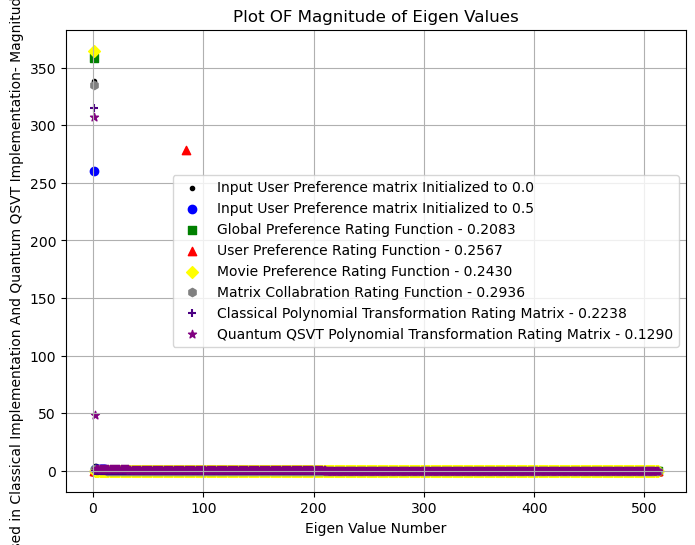

512


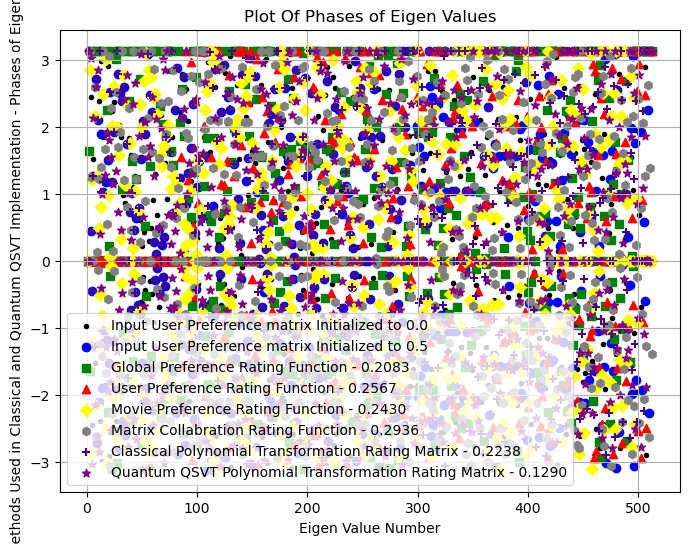

512


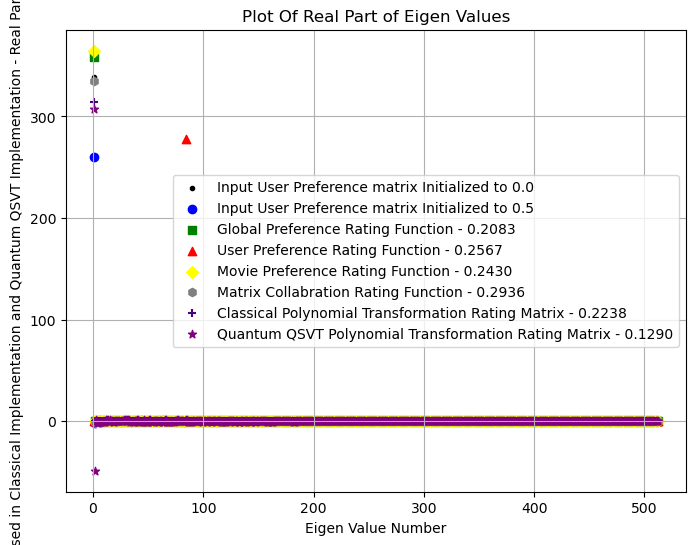

512


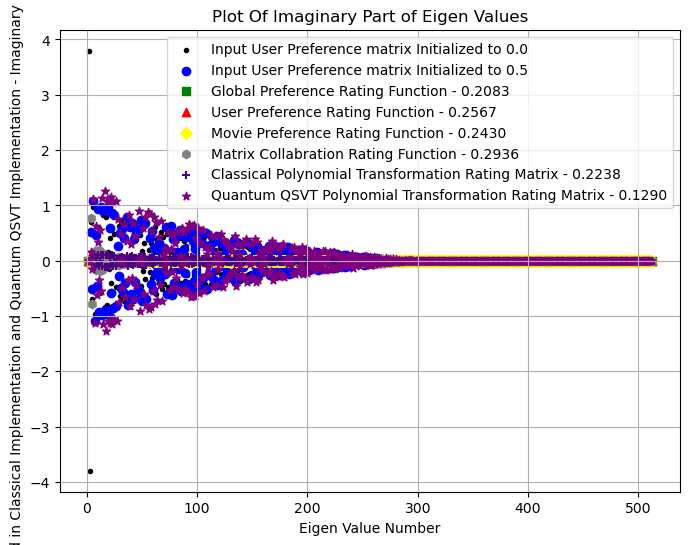

In [41]:
# Eigen Values Plots Comparison by All the Classical Methods and Quantum QSVT Method...

# Eigen Values for Classical Polynomial Transformation Method's Reconstructed User Preference Rating Matrix

eigenvalues_input_matrix_7 = np.linalg.eigvals(QSVT_Reconstructed_User_Preference_Rating_Matrix)
eigenvalues_input_list_7 = eigenvalues_input_matrix_7.tolist()

print('QSVT Reconstructed User Preference Rating Matrix Eigen Values:')
print(eigenvalues_input_list_7)


import cmath

# Magnitude,Phase,Real and Imaginary Eigen Value Lists of the Input User Preference Rating Matrix Initialized to 0.0

# Initialize lists to store the results
magnitude_list_7 = []
phase_list_7 = []
real_list_7 = []
imaginary_list_7 = []

# Calculate the magnitude, phase, real, and imaginary parts for each complex number
for z in eigenvalues_input_list_7:
    magnitude_7 = abs(z)
    phase_7 = cmath.phase(z)
    real_part_7 = z.real
    imaginary_part_7 = z.imag
    
    # Append the results to the respective lists
    magnitude_list_7.append(magnitude_7)
    phase_list_7.append(phase_7)
    real_list_7.append(real_part_7)
    imaginary_list_7.append(imaginary_part_7)

# Print the results
print("Magnitude List:", magnitude_list_7)
print("Phase List:", phase_list_7)
print("Real Value List:", real_list_7)
print("Imaginary Value List:", imaginary_list_7)

# Eigen Value Magnitude Plots vs Eigen Value Number for All Reconstructed Matrices and Original Input Matrices in the Recommendation System Solving by Classical Methods.

import matplotlib.pyplot as plt

# Sample data for x values (assuming the same x values for all lists)
x = np.linspace(1,512,512)
print(len(x))

# Sample data for four different sets of y values
y0 = magnitude_list_0 # Input User Preference matrix Initialized to 0.0
y1 = magnitude_list_1 # Input User Preference matrix Initialized to 0.5 
y2 = magnitude_list_2 # Global Preference Rating Matrix 
y3 = magnitude_list_3 # User Preference Rating Matrix 
y4 = magnitude_list_4 # Movie Preference Rating Matrix 
y5 = magnitude_list_5 # Matrix Collaborative Rating Method Matrix
y6 = magnitude_list_6 # Classical Polynomial Transformation Rating Matrix
y7 = magnitude_list_7 # Quantum QSVT Polynomial Transformation Rating Matrix

# Create a single plot for all data
plt.figure(figsize=(8, 6))  # Create a new figure

# Scatter plots for each set of y values

plt.scatter(x, y0, color='black', label='Input User Preference matrix Initialized to 0.0', marker='.')
plt.scatter(x, y1, color='blue', label='Input User Preference matrix Initialized to 0.5', marker='o')
plt.scatter(x, y2, color='green', label='Global Preference Rating Function - 0.2083', marker='s')
plt.scatter(x, y3, color='red', label='User Preference Rating Function - 0.2567', marker='^')
plt.scatter(x, y4, color='yellow', label='Movie Preference Rating Function - 0.2430', marker='D')
plt.scatter(x, y5, color='grey', label='Matrix Collabration Rating Function - 0.2936', marker='h')
plt.scatter(x, y6, color='indigo', label='Classical Polynomial Transformation Rating Matrix - 0.2238', marker='+')
plt.scatter(x, y7, color='purple', label='Quantum QSVT Polynomial Transformation Rating Matrix - 0.1290', marker='*')

# Line Plots for each set of y values

# plt.plot(x, y0, color='black', label='Input User Preference matrix Initialized to 0.0', marker='.')
# plt.plot(x, y1, color='blue', label='Input User Preference matrix Initialized to 0.5', marker='o')
# plt.plot(x, y2, color='green', label='Global Preference Rating Function - 0.2083', marker='s')
# plt.plot(x, y3, color='red', label='User Preference Rating Function - 0.2567', marker='^')
# plt.plot(x, y4, color='yellow', label='Movie Preference Rating Function - 0.2430', marker='D')
# plt.plot(x, y5, color='grey', label='Matrix Collabration Rating Function - 0.2936', marker='h')
# plt.plot(x, y6, color='indigo', label='Classical Polynomial Transformation Rating Matrix - 0.2238', marker='+')

# Add labels and a legend
plt.xlabel('Eigen Value Number')
plt.ylabel('All Methods Used in Classical Implementation And Quantum QSVT Implementation- Magnitude of Eigen Values')
plt.legend()

# Show the plot
plt.grid(True)
plt.title('Plot OF Magnitude of Eigen Values')

#plt.figure(figsize=(100, 60))
plt.show()

# Eigen Value Phase Plots vs Eigen Value Number for All Reconstructed Matrices and Original Input Matrices in the Recommendation System Solving by Classical Methods.

# Sample data for x values (assuming the same x values for all lists)
x = np.linspace(1,512,512)
print(len(x))

# Sample data for four different sets of y values
y0 = phase_list_0 # Input User Preference matrix Initialized to 0.0
y1 = phase_list_1 # Input User Preference matrix Initialized to 0.5 
y2 = phase_list_2 # Global Preference Rating Matrix 
y3 = phase_list_3 # User Preference Rating Matrix 
y4 = phase_list_4 # Movie Preference Rating Matrix 
y5 = phase_list_5 # Matrix Collaborative Rating Method Matrix
y6 = phase_list_6 # Classical Polynomial Transformation Rating Matrix
y7 = phase_list_7 # Quantum QSVT Implementation Rating Matrix

# Create a single plot for all data
plt.figure(figsize=(8, 6))  # Create a new figure

# Scatter plots for each set of y values

plt.scatter(x, y0, color='black', label='Input User Preference matrix Initialized to 0.0', marker='.')
plt.scatter(x, y1, color='blue', label='Input User Preference matrix Initialized to 0.5', marker='o')
plt.scatter(x, y2, color='green', label='Global Preference Rating Function - 0.2083', marker='s')
plt.scatter(x, y3, color='red', label='User Preference Rating Function - 0.2567', marker='^')
plt.scatter(x, y4, color='yellow', label='Movie Preference Rating Function - 0.2430', marker='D')
plt.scatter(x, y5, color='grey', label='Matrix Collabration Rating Function - 0.2936', marker='h')
plt.scatter(x, y6, color='indigo', label='Classical Polynomial Transformation Rating Matrix - 0.2238', marker='+')
plt.scatter(x, y7, color='purple', label='Quantum QSVT Polynomial Transformation Rating Matrix - 0.1290', marker='*')

# Line Plots for each set of y values

# plt.plot(x, y0, color='black', label='Input User Preference matrix Initialized to 0.0', marker='.')
# plt.plot(x, y1, color='blue', label='Input User Preference matrix Initialized to 0.5', marker='o')
# plt.plot(x, y2, color='green', label='Global Preference Rating Function - 0.2083', marker='s')
# plt.plot(x, y3, color='red', label='User Preference Rating Function - 0.2567', marker='^')
# plt.plot(x, y4, color='yellow', label='Movie Preference Rating Function - 0.2430', marker='D')
# plt.plot(x, y5, color='grey', label='Matrix Collabration Rating Function - 0.2936', marker='h')
# plt.plot(x, y6, color='indigo', label='Classical Polynomial Transformation Rating Matrix - 0.2238', marker='+')

# Add labels and a legend
plt.xlabel('Eigen Value Number')
plt.ylabel('All Methods Used in Classical and Quantum QSVT Implementation - Phases of Eigen Values')
plt.legend()

# Show the plot
plt.grid(True)
plt.title('Plot Of Phases of Eigen Values')

#plt.figure(figsize=(100, 60))
plt.show()

# Eigen Value Real Plots vs Eigen Value Number for All Reconstructed Matrices and Original Input Matrices in the Recommendation System Solving by Classical Methods.

# Sample data for x values (assuming the same x values for all lists)
x = np.linspace(1,512,512)
print(len(x))

# Sample data for four different sets of y values
y0 = real_list_0 # Input User Preference matrix Initialized to 0.0
y1 = real_list_1 # Input User Preference matrix Initialized to 0.5 
y2 = real_list_2 # Global Preference Rating Matrix 
y3 = real_list_3 # User Preference Rating Matrix 
y4 = real_list_4 # Movie Preference Rating Matrix 
y5 = real_list_5 # Matrix Collaborative Rating Method Matrix
y6 = real_list_6 # Classical Polynomial Transformation Rating Matrix
y7 = real_list_7 # Quantum QSVT Polynomial Transformation Rating Matrix

# Create a single plot for all data
plt.figure(figsize=(8, 6))  # Create a new figure

# Scatter plots for each set of y values

plt.scatter(x, y0, color='black', label='Input User Preference matrix Initialized to 0.0', marker='.')
plt.scatter(x, y1, color='blue', label='Input User Preference matrix Initialized to 0.5', marker='o')
plt.scatter(x, y2, color='green', label='Global Preference Rating Function - 0.2083', marker='s')
plt.scatter(x, y3, color='red', label='User Preference Rating Function - 0.2567', marker='^')
plt.scatter(x, y4, color='yellow', label='Movie Preference Rating Function - 0.2430', marker='D')
plt.scatter(x, y5, color='grey', label='Matrix Collabration Rating Function - 0.2936', marker='h')
plt.scatter(x, y6, color='indigo', label='Classical Polynomial Transformation Rating Matrix - 0.2238', marker='+')
plt.scatter(x, y7, color='purple', label='Quantum QSVT Polynomial Transformation Rating Matrix - 0.1290', marker='*')


# Line Plots for each set of y values

# plt.plot(x, y0, color='black', label='Input User Preference matrix Initialized to 0.0', marker='.')
# plt.plot(x, y1, color='blue', label='Input User Preference matrix Initialized to 0.5', marker='o')
# plt.plot(x, y2, color='green', label='Global Preference Rating Function - 0.2083', marker='s')
# plt.plot(x, y3, color='red', label='User Preference Rating Function - 0.2567', marker='^')
# plt.plot(x, y4, color='yellow', label='Movie Preference Rating Function - 0.2430', marker='D')
# plt.plot(x, y5, color='grey', label='Matrix Collabration Rating Function - 0.2936', marker='h')
# plt.plot(x, y6, color='indigo', label='Classical Polynomial Transformation Rating Matrix - 0.2238', marker='+')

# Add labels and a legend
plt.xlabel('Eigen Value Number')
plt.ylabel('All Methods Used in Classical Implementation and Quantum QSVT Implementation - Real Part of Eigen Values')
plt.legend()

# Show the plot
plt.grid(True)
plt.title('Plot Of Real Part of Eigen Values')

#plt.figure(figsize=(100, 60))
plt.show()

# Eigen Value Imaginary Plots vs Eigen Value Number for All Reconstructed Matrices and Original Input Matrices in the Recommendation System Solving by Classical Methods.

# Sample data for x values (assuming the same x values for all lists)
x = np.linspace(1,512,512)
print(len(x))

# Sample data for four different sets of y values
y0 = imaginary_list_0 # Input User Preference matrix Initialized to 0.0
y1 = imaginary_list_1 # Input User Preference matrix Initialized to 0.5 
y2 = imaginary_list_2 # Global Preference Rating Matrix 
y3 = imaginary_list_3 # User Preference Rating Matrix 
y4 = imaginary_list_4 # Movie Preference Rating Matrix 
y5 = imaginary_list_5 # Matrix Collaborative Rating Method Matrix
y6 = imaginary_list_6 # Classical Polynomial Transformation Rating Matrix
y7 = imaginary_list_7 # Quantum QSVT Polynomial Transformation Rating Matrix

# Create a single plot for all data
plt.figure(figsize=(8, 6))  # Create a new figure

# Scatter plots for each set of y values

plt.scatter(x, y0, color='black', label='Input User Preference matrix Initialized to 0.0', marker='.')
plt.scatter(x, y1, color='blue', label='Input User Preference matrix Initialized to 0.5', marker='o')
plt.scatter(x, y2, color='green', label='Global Preference Rating Function - 0.2083', marker='s')
plt.scatter(x, y3, color='red', label='User Preference Rating Function - 0.2567', marker='^')
plt.scatter(x, y4, color='yellow', label='Movie Preference Rating Function - 0.2430', marker='D')
plt.scatter(x, y5, color='grey', label='Matrix Collabration Rating Function - 0.2936', marker='h')
plt.scatter(x, y6, color='indigo', label='Classical Polynomial Transformation Rating Matrix - 0.2238', marker='+')
plt.scatter(x, y7, color='purple', label='Quantum QSVT Polynomial Transformation Rating Matrix - 0.1290', marker='*')

# Line Plots for each set of y values

# plt.plot(x, y0, color='black', label='Input User Preference matrix Initialized to 0.0', marker='.')
# plt.plot(x, y1, color='blue', label='Input User Preference matrix Initialized to 0.5', marker='o')
# plt.plot(x, y2, color='green', label='Global Preference Rating Function - 0.2083', marker='s')
# plt.plot(x, y3, color='red', label='User Preference Rating Function - 0.2567', marker='^')
# plt.plot(x, y4, color='yellow', label='Movie Preference Rating Function - 0.2430', marker='D')
# plt.plot(x, y5, color='grey', label='Matrix Collabration Rating Function - 0.2936', marker='h')
# plt.plot(x, y6, color='indigo', label='Classical Polynomial Transformation Rating Matrix - 0.2238', marker='+')

# Add labels and a legend
plt.xlabel('Eigen Value Number')
plt.ylabel('All Methods Used in Classical Implementation and Quantum QSVT Implementation - Imaginary Part of Eigen Values')
plt.legend()

# Show the plot
plt.grid(True)
plt.title('Plot Of Imaginary Part of Eigen Values')

#plt.figure(figsize=(100, 60))
plt.show()



<div align = "center"><font size = "5.5">Benchmarking of Time,Memory and Accuracy in the Classical Implementation and Quantum Emulation of the Recommendation Systems</font></div>

In [3]:
from IPython.display import display
from PIL import Image


path="C:\Users\Akshay Patil\Benchmarking Time,Memory and Accuracy of the Classical and Quantum Implementation.png"
display(Image.open(path))

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (4171391437.py, line 5)

<div align = "center"><font size = "5.5">Transpiling the Input User Preference Rating Matrix Initialized to 0.5 into known set of universal gates,beaware that the Computational Cost for this is almost 1.5 hours on a 64 GB RAM Processor, so run it in your sparetime </font></div>

In [1]:
# import numpy as np
# from qiskit import QuantumCircuit, transpile
# from qiskit.quantum_info.operators import Operator

# # Define your 1024x1024 unitary matrix as a numpy array
#  # You should replace this with your actual unitary matrix

# # Convert the unitary matrix to a QuantumCircuit
# unitary_op = Operator(Input_User_Preference_Rating_Matrix_Initialized_to_0dot5_in_unitary_form)
# qc = QuantumCircuit(10)  # Create a 10-qubit circuit, adjust the number of qubits as needed
# qc.unitary(unitary_op, list(range(10)))

# # Transpile the circuit to decompose it into universal gates
# decomposed_circuit_ = transpile(qc, basis_gates=['u1', 'u2', 'u3', 'cx'])

# # Display the decomposed circuit and qubit lines
# print(decomposed_circuit_)

# # You can also draw the circuit for visualization
# decomposed_circuit_.draw(output='mpl')